# Creating matrices for pairs of labels

## Which ones?

- Sequence-based ML model F1 scores
- Sequence similarity scores
- annotation similarity scores
- annotation overlap

## For which dataset?

- First for yeast because of conference

In [1]:
from subpred.util import load_df
import networkx as nx
import pandas as pd
from subpred.transmembrane_transporters import get_transmembrane_transporter_dataset

Some parameters:

In [2]:
ORGANISM_IDS = {559292}
# ORGANISM_IDS = None
SWISSPROT_ONLY = False  # does not make a difference for yeast
MAX_SEQUENCE_EVIDENCE_CODE = 1
EXCLUDE_IEA_GO_TERMS = False
REMOVE_PROTEINS_WITHOUT_GENE_NAMES = True  # Does not make a difference for yeast

Creating the dataset:

In [3]:
# With organisms other than yeast, it might be interesting to cluster at 100% sequence similarity at the beginning
df_sequences, df_uniprot_goa, df_go_chebi = get_transmembrane_transporter_dataset(
    organism_ids=ORGANISM_IDS,
    swissprot_only=SWISSPROT_ONLY,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=EXCLUDE_IEA_GO_TERMS,
    max_sequence_evidence_code=MAX_SEQUENCE_EVIDENCE_CODE,
    remove_proteins_without_gene_names=REMOVE_PROTEINS_WITHOUT_GENE_NAMES,
)
display(df_sequences)
display(df_uniprot_goa)
display(df_go_chebi)

,sequence,reviewed,protein_existence,organism_id,protein_names
Uniprot,,,,,
P00401,MVQRWLYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQ...,True,1,559292,Cytochrome c oxidase subunit 1 (EC 7.1.1.9) (C...
P00830,MVLPRLYTATSRAAFKAAKQSAPLLSTSWKRCMASAAQSTPITGKV...,True,1,559292,"ATP synthase subunit beta, mitochondrial (EC 7..."
P04817,MTNSKEDADIEEKHMYNEPVTTLFHDVEASQTHHRRGSIPLKDEKS...,True,1,559292,Arginine permease CAN1 (Canavanine resistance ...
P07213,MKSFITRNKTAILATVAATGTAIGAYYYYNQLQQQQQRGKKNTINK...,True,1,559292,Mitochondrial import receptor subunit TOM70 (7...
P14906,MPTNYEYDEASETWPSFILTGLLMVVGPMTLLQIYQIFFGANAEDG...,True,1,559292,Protein translocation protein SEC63 (Protein N...
...,...,...,...,...,...
P39542,MFQQLSASIRHNAHIIFLCISWYFISSLASQVTKQVLTVCPLPLFL...,True,1,559292,Uncharacterized transporter YJL193W
Q05497,MAGILSKTLSEVHPSLRTNGMGIGNTHRRISLGFLPPNKKNPLVRK...,True,1,559292,Uncharacterized transporter YDR338C
P38318,MEPKRKSGSLAKHDLPQFYLLIMLYLAQGIPVGLAFGTVPFLLKSL...,True,1,559292,Uncharacterized membrane protein YBR220C


,Uniprot,qualifier,go_id,go_term,evidence_code,aspect,go_id_ancestor,go_term_ancestor
0,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:1901505,carbohydrate derivative transmembrane transpor...
1,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0005346,purine ribonucleotide transmembrane transporte...
2,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0008514,organic anion transmembrane transporter activity
3,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0015932,nucleobase-containing compound transmembrane t...
4,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0015216,purine nucleotide transmembrane transporter ac...
...,...,...,...,...,...,...,...,...
7732,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0022804,active transmembrane transporter activity
7733,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0015453,oxidoreduction-driven active transmembrane tra...
7734,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0015078,proton transmembrane transporter activity
7735,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0022890,inorganic cation transmembrane transporter act...


,go_id,go_term,chebi_id,chebi_term,chebi_go_relation,chebi_id_ancestor,chebi_term_ancestor
0,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:35238,amino acid zwitterion
1,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33719,alpha-amino-acid cation
2,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:24431,chemical entity
3,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:36358,polyatomic ion
4,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33675,p-block molecular entity
...,...,...,...,...,...,...,...
8098,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:33256,primary amide
8099,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:50860,organic molecular entity
8100,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:35352,organonitrogen compound
8101,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:16670,peptide


How many proteins after sequence clustering at 70%?

In [4]:
from subpred.cdhit import cd_hit

len(cd_hit(df_sequences.sequence, 70))

cd-hit: clustered 332 sequences into 303 clusters at threshold 70


303

How many proteins are (not) manually curated?

In [5]:
df_sequences.drop_duplicates().reviewed.value_counts()

reviewed
True    332
Name: count, dtype: int64

How many GO terms are directly annotated?

In [6]:
df_uniprot_goa[["Uniprot", "go_id"]].drop_duplicates().go_id.unique().shape

(211,)

How many GO terms after adding direct, logical ancestors of these GO terms?

In [7]:
df_uniprot_goa[
    ["Uniprot", "go_id_ancestor"]
].drop_duplicates().go_id_ancestor.unique().shape

(288,)

In [8]:
tmp = df_uniprot_goa[["Uniprot", "go_id_ancestor", "evidence_code"]]
display(
    tmp[tmp.evidence_code != "IEA"]
    .drop("evidence_code", axis=1)
    .drop_duplicates()
    .shape
)
display(tmp.drop("evidence_code", axis=1).drop_duplicates().shape)
del tmp

(2919, 2)

(3299, 2)

How many transporter go terms have chebi terms? 

In [9]:
df_go_chebi_primary = df_go_chebi[
    df_go_chebi.chebi_go_relation == "has_primary_input"
].reset_index(drop=True)
df_go_chebi_primary

,go_id,go_term,chebi_id,chebi_term,chebi_go_relation,chebi_id_ancestor,chebi_term_ancestor
0,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:35238,amino acid zwitterion
1,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33719,alpha-amino-acid cation
2,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:24431,chemical entity
3,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:36358,polyatomic ion
4,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33675,p-block molecular entity
...,...,...,...,...,...,...,...
5151,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:33256,primary amide
5152,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:50860,organic molecular entity
5153,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:35352,organonitrogen compound
5154,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:16670,peptide


In [10]:
df_go_chebi_primary.go_id.unique().size

221

How many have chebi terms with given molecular property?

In [11]:
from subpred.chebi_annotations import get_chebi_molecular_properties

df_molecular_properties = get_chebi_molecular_properties("../data/datasets/")
for mol_prop in sorted(df_molecular_properties.property.unique()):
    print(
        f"GO terms annotated with ChEBI terms annotated with {mol_prop} before adding ChEBI ancestors:",
        df_go_chebi_primary[
            df_go_chebi_primary.chebi_id.isin(
                df_molecular_properties[
                    df_molecular_properties.property == mol_prop
                ].chebi_id
            )
        ]
        .go_id.unique()
        .size,
    )
    print(
        f"GO terms annotated with ChEBI terms annotated with {mol_prop} after adding ChEBI ancestors:",
        df_go_chebi_primary[
            df_go_chebi_primary.chebi_id_ancestor.isin(
                df_molecular_properties[
                    df_molecular_properties.property == mol_prop
                ].chebi_id
            )
        ]
        .go_id.unique()
        .size,
    )

GO terms annotated with ChEBI terms annotated with charge before adding ChEBI ancestors: 137
GO terms annotated with ChEBI terms annotated with charge after adding ChEBI ancestors: 157
GO terms annotated with ChEBI terms annotated with formula before adding ChEBI ancestors: 143
GO terms annotated with ChEBI terms annotated with formula after adding ChEBI ancestors: 163
GO terms annotated with ChEBI terms annotated with inchi before adding ChEBI ancestors: 124
GO terms annotated with ChEBI terms annotated with inchi after adding ChEBI ancestors: 124
GO terms annotated with ChEBI terms annotated with inchikey before adding ChEBI ancestors: 124
GO terms annotated with ChEBI terms annotated with inchikey after adding ChEBI ancestors: 124
GO terms annotated with ChEBI terms annotated with mass before adding ChEBI ancestors: 141
GO terms annotated with ChEBI terms annotated with mass after adding ChEBI ancestors: 163
GO terms annotated with ChEBI terms annotated with monoisotopicmass before 

plot: number of proteins annotated with the GO term, does it have a smiles representation

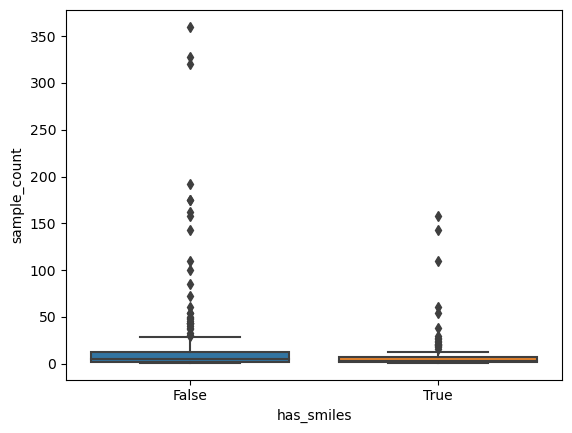

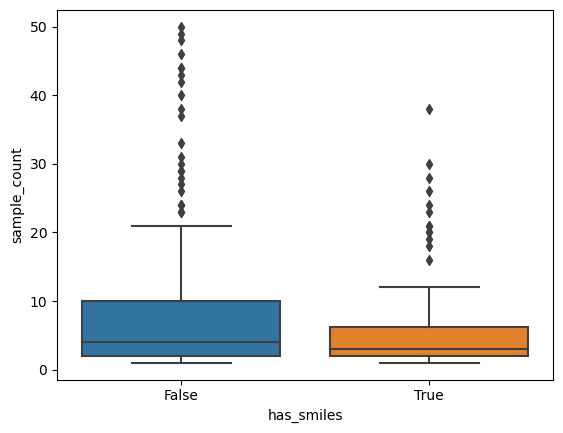

,sample_count
count,149.000000
mean,8.832215
std,20.613038
min,1.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,158.000000


,sample_count
count,221.000000
mean,19.479638
std,48.106849
min,1.000000
25%,2.000000
50%,5.000000
75%,13.000000
max,360.000000


In [12]:
tmp = (
    df_go_chebi_primary.merge(
        df_uniprot_goa[["Uniprot", "go_id_ancestor"]]
        .groupby("go_id_ancestor")
        .apply(lambda x: len(x.Uniprot))
        .rename("sample_count")
        .reset_index(),
        how="left",
        left_on="go_id",
        right_on="go_id_ancestor",
    )
    .assign(
        has_smiles=df_go_chebi_primary.chebi_id_ancestor.isin(
            df_molecular_properties[
                df_molecular_properties.property == "smiles"
            ].chebi_id
        )
    )[["go_id", "sample_count", "has_smiles"]]
    .drop_duplicates()
)

import seaborn as sns
import matplotlib.pyplot as plt

# sns.violinplot(tmp, x="has_smiles", y="sample_count")
sns.boxplot(tmp, x="has_smiles", y="sample_count")
plt.show()

sns.boxplot(tmp[tmp.sample_count <= 50], x="has_smiles", y="sample_count")
plt.show()
display(tmp[tmp.has_smiles].describe())
display(tmp[~tmp.has_smiles].describe())

Which GO terms have SMILES and enough samples available?

In [13]:
tmp = (
    tmp[tmp.has_smiles & (tmp.sample_count >= 20)]
    .merge(
        df_uniprot_goa[["go_id_ancestor", "go_term_ancestor"]],
        how="left",
        left_on="go_id",
        right_on="go_id_ancestor",
    )
    .drop_duplicates()
    .reset_index(drop=True)
)
tmp

,go_id,sample_count,has_smiles,go_id_ancestor,go_term_ancestor
0,GO:0005310,20,True,GO:0005310,dicarboxylic acid transmembrane transporter ac...
1,GO:0005351,23,True,GO:0005351,carbohydrate:proton symporter activity
2,GO:0005385,20,True,GO:0005385,zinc ion transmembrane transporter activity
3,GO:0008028,24,True,GO:0008028,monocarboxylic acid transmembrane transporter ...
4,GO:0009678,54,True,GO:0009678,pyrophosphate hydrolysis-driven proton transme...
5,GO:0015078,143,True,GO:0015078,proton transmembrane transporter activity
6,GO:0015079,28,True,GO:0015079,potassium ion transmembrane transporter activity
7,GO:0015081,21,True,GO:0015081,sodium ion transmembrane transporter activity
8,GO:0015085,30,True,GO:0015085,calcium ion transmembrane transporter activity
9,GO:0015171,110,True,GO:0015171,amino acid transmembrane transporter activity


How many transporters do these GO terms cover?

In [14]:
df_uniprot_goa[df_uniprot_goa.go_id_ancestor.isin(tmp.go_id)].Uniprot.unique()

<StringArray>
['P00163', 'P00401', 'P00410', 'P00420', 'P00830', 'P00854', 'P00856',
 'P03877', 'P03878', 'P04817',
 ...
 'Q12372', 'Q12375', 'Q12407', 'Q12436', 'Q12691', 'Q3E7B6', 'Q99271',
 'Q99297', 'Q99385', 'Q9ZZX1']
Length: 173, dtype: string

What are some examples of proteins and go terms that are no longer annotated?

In [15]:
df_uniprot_goa[
    ~df_uniprot_goa.go_id_ancestor.isin(tmp.go_id)
].go_term_ancestor.value_counts()

go_term_ancestor
transmembrane transporter activity                                                   1103
inorganic molecular entity transmembrane transporter activity                         385
monoatomic ion transmembrane transporter activity                                     360
monoatomic cation transmembrane transporter activity                                  328
active transmembrane transporter activity                                             324
                                                                                     ... 
5'-adenylyl sulfate transmembrane transporter activity                                  1
beta-alanine transmembrane transporter activity                                         1
proton-dependent oligopeptide secondary active transmembrane transporter activity       1
voltage-gated potassium channel activity                                                1
UDP-glucose transmembrane transporter activity                                     

In [16]:
tmp_proteins_no_chebi_terms = df_sequences.loc[
    df_uniprot_goa[~df_uniprot_goa.go_id_ancestor.isin(tmp.go_id)].Uniprot.unique()
].protein_names

Is there some other way of filtering?

In [17]:
df_sequences.assign(
    has_chebi=df_sequences.index.isin(
        df_uniprot_goa.merge(
            df_go_chebi, how="inner", left_on="go_id_ancestor", right_on="go_id"
        ).Uniprot
    ),
)

,sequence,reviewed,protein_existence,organism_id,protein_names,has_chebi
Uniprot,,,,,,
P00401,MVQRWLYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQ...,True,1,559292,Cytochrome c oxidase subunit 1 (EC 7.1.1.9) (C...,True
P00830,MVLPRLYTATSRAAFKAAKQSAPLLSTSWKRCMASAAQSTPITGKV...,True,1,559292,"ATP synthase subunit beta, mitochondrial (EC 7...",True
P04817,MTNSKEDADIEEKHMYNEPVTTLFHDVEASQTHHRRGSIPLKDEKS...,True,1,559292,Arginine permease CAN1 (Canavanine resistance ...,True
P07213,MKSFITRNKTAILATVAATGTAIGAYYYYNQLQQQQQRGKKNTINK...,True,1,559292,Mitochondrial import receptor subunit TOM70 (7...,True
P14906,MPTNYEYDEASETWPSFILTGLLMVVGPMTLLQIYQIFFGANAEDG...,True,1,559292,Protein translocation protein SEC63 (Protein N...,True
...,...,...,...,...,...,...
P39542,MFQQLSASIRHNAHIIFLCISWYFISSLASQVTKQVLTVCPLPLFL...,True,1,559292,Uncharacterized transporter YJL193W,True
Q05497,MAGILSKTLSEVHPSLRTNGMGIGNTHRRISLGFLPPNKKNPLVRK...,True,1,559292,Uncharacterized transporter YDR338C,False
P38318,MEPKRKSGSLAKHDLPQFYLLIMLYLAQGIPVGLAFGTVPFLLKSL...,True,1,559292,Uncharacterized membrane protein YBR220C,True


## Adjacency matrix

In [18]:
from subpred.adjacency_matrices import (
    get_chebi_adjacency_matrix,
    get_go_adjacency_matrix,
)

### GO adjacency

In [19]:
df_adj_matrix_go = get_go_adjacency_matrix(
    df_uniprot_goa=df_uniprot_goa, edges_filter={"is_a"}
)
df_adj_matrix_go

,GO:0000006,GO:0000007,GO:0000064,GO:0000095,GO:0000099,GO:0000100,GO:0000102,GO:0000295,GO:0000297,GO:0000319,...,GO:1901474,GO:1901505,GO:1901618,GO:1901680,GO:1901682,GO:1901702,GO:1902557,GO:1903089,GO:1903425,GO:1904680
GO:0000006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0000007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0000064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0000095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
GO:0000099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:1901702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:1902557,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
GO:1903089,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
GO:1903425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### ChEBI adjacency

In [20]:
df_adj_matrix_chebi = get_chebi_adjacency_matrix(
    df_go_chebi=df_go_chebi,
    edges_filter={"is_a"},
    primary_substrate_only=True,
)
df_adj_matrix_chebi

,CHEBI:13389,CHEBI:15354,CHEBI:15361,CHEBI:15377,CHEBI:15595,CHEBI:15676,CHEBI:15792,CHEBI:15927,CHEBI:16189,CHEBI:16199,...,CHEBI:61109,CHEBI:61292,CHEBI:61293,CHEBI:61336,CHEBI:63063,CHEBI:63299,CHEBI:64709,CHEBI:68452,CHEBI:77847,CHEBI:83821
CHEBI:13389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEBI:63299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:64709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:68452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:77847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Chemical similarity

Here, we are using the morgan fingerprints. There are other options that might be better:


In [21]:
from subpred.chemical_similarity import get_pairwise_similarity, tanimoto_chebi_to_go

dict_tanimoto_matrices_chebi = {
    f"tanimoto_{method}": get_pairwise_similarity(
        df_go_chebi=df_go_chebi, fingerprint_method=method
    )
    for method in ["morgan", "atompairs", "torsions", "maccs"]
}

[10:15:04] WARNING: not removing hydrogen atom without neighbors
[10:15:08] WARNING: not removing hydrogen atom without neighbors
[10:15:13] WARNING: not removing hydrogen atom without neighbors
[10:15:17] WARNING: not removing hydrogen atom without neighbors


In [22]:
dict_tanimoto_matrices_go = {
    f"{matrix_name}_go_{agg_method}": tanimoto_chebi_to_go(
        df_tanimoto_chebi=df_tanimoto_chebi,
        df_go_chebi=df_go_chebi,
        agg_function=agg_method,
        primary_input_only=True,
    )
    for matrix_name, df_tanimoto_chebi in dict_tanimoto_matrices_chebi.items()
    for agg_method in ["mean", "median", "min", "max"]
}
dict_tanimoto_matrices_go

{'tanimoto_morgan_go_mean': go_id2      GO:0000064  GO:0000095  GO:0000100  GO:0000102  GO:0000297  \
 go_id1                                                                   
 GO:0000064    1.000000    0.218750    0.500000    0.500000    0.222222   
 GO:0000095    0.218750    1.000000    0.311475    0.230769    0.028986   
 GO:0000100    0.500000    0.311475    1.000000    0.517241    0.060606   
 GO:0000102    0.500000    0.230769    0.517241    1.000000    0.060606   
 GO:0000297    0.222222    0.028986    0.060606    0.060606    1.000000   
 ...                ...         ...         ...         ...         ...   
 GO:1901235    0.212121    0.130435    0.235294    0.235294    0.031250   
 GO:1901239    0.250000    0.096774    0.230769    0.230769    0.045455   
 GO:1902557    0.057143    0.493333    0.055556    0.055556    0.015152   
 GO:1903089    0.074074    0.352113    0.071429    0.071429    0.020000   
 GO:1903425    0.000000    0.000000    0.000000    0.000000    0.000000  

## Overlap Matrix

### GO

In [23]:
from subpred.overlap_matrix import get_go_overlap_matrix, plot_go_overlap_matrix

df_go_overlaps = get_go_overlap_matrix(
    df_uniprot_goa=df_uniprot_goa, exclude_iea=EXCLUDE_IEA_GO_TERMS
)
df_go_overlaps

go_id2,GO:0000006,GO:0000007,GO:0000064,GO:0000095,GO:0000099,GO:0000100,GO:0000102,GO:0000295,GO:0000297,GO:0000319,...,GO:1901474,GO:1901505,GO:1901618,GO:1901680,GO:1901682,GO:1901702,GO:1902557,GO:1903089,GO:1903425,GO:1904680
go_id1,,,,,,,,,,,,,,,,,,,,,
GO:0000006,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
GO:0000007,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
GO:0000064,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0000095,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
GO:0000099,0,0,0,0,3,0,1,0,0,0,...,0,0,0,1,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:1901702,1,1,0,0,0,0,0,8,0,1,...,3,8,3,0,9,72,0,0,2,0
GO:1902557,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
GO:1903089,0,0,0,0,0,0,0,0,0,0,...,2,2,0,0,1,0,0,2,0,0


In [24]:
# plot_go_overlap_matrix(df_go_overlaps=df_go_overlaps, df_uniprot_goa=df_uniprot_goa)

### ChEBI

In [25]:
from subpred.overlap_matrix import get_chebi_overlaps

df_chebi_overlaps = get_chebi_overlaps(
    df_go_chebi=df_go_chebi,
    df_uniprot_goa=df_uniprot_goa,
    exclude_iea=EXCLUDE_IEA_GO_TERMS,
    primary_input_only=True,
)
df_chebi_overlaps

,CHEBI:13389,CHEBI:15354,CHEBI:15361,CHEBI:15377,CHEBI:15595,CHEBI:15676,CHEBI:15792,CHEBI:15927,CHEBI:16189,CHEBI:16199,...,CHEBI:61109,CHEBI:61292,CHEBI:61293,CHEBI:61336,CHEBI:63063,CHEBI:63299,CHEBI:64709,CHEBI:68452,CHEBI:77847,CHEBI:83821
CHEBI:13389,2,0,1,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,0,0
CHEBI:15354,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEBI:15361,1,0,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,4,0,0,0
CHEBI:15377,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15595,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEBI:63299,0,0,0,0,0,0,0,2,0,0,...,2,0,10,2,0,25,3,2,1,0
CHEBI:64709,1,0,4,0,1,0,1,0,2,0,...,0,0,3,6,2,3,65,3,0,5
CHEBI:68452,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,2,3,8,0,2
CHEBI:77847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## GO Semantic Similarity Matrix


In [26]:
from subpred.go_semantic_similarity import get_semantic_similarities

# Not using TCSS, because choice of threshold value was not clear from original publication or from R-package doc+code
# If using TCSS in the future, the processTCSS parameter in go_semantic_similarity.py has to be set to TRUE
# https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-11-562#Sec13
# cutoff 3.2 from original paper, but was calculated on 2010 dataset.
# Method from gosemsim R package for calculating cutoff no longer works

semsim_measures = ["Resnik", "Lin", "Rel", "Jiang", "Wang"]

# prints error about pfam column that is unrelated to data that is actually used in calculation (GO and Entrez)
# Running the R code in a script gives same results (tested)
dict_semsim_matrices = {
    semsim_measure: get_semantic_similarities(
        go_terms=df_uniprot_goa.go_id_ancestor.unique().tolist(),
        measure=semsim_measure,
        organism="yeast",
        ont="MF",
        tcss_cutoff=3,
    )
    for semsim_measure in semsim_measures
}

R[write to console]: Error in (function ()  : 
  org.Sc.sgdPFAM is defunct. Please use select() if you need access to
  PFAM or PROSITE accessions.

/home/andy/mambaforge/envs/subpred4/lib/python3.10/site-packages/rpy2/robjects/packages.py:263: UserWarning: R C-API Rf_findVarInFrame()
  warn(str(rre))
R[write to console]: preparing gene to GO mapping data...

R[write to console]: preparing IC data...

R[write to console]: Error in (function ()  : 
  org.Sc.sgdPFAM is defunct. Please use select() if you need access to
  PFAM or PROSITE accessions.

/home/andy/mambaforge/envs/subpred4/lib/python3.10/site-packages/rpy2/robjects/packages.py:263: UserWarning: R C-API Rf_findVarInFrame()
  warn(str(rre))
R[write to console]: preparing gene to GO mapping data...

R[write to console]: preparing IC data...

R[write to console]: Error in (function ()  : 
  org.Sc.sgdPFAM is defunct. Please use select() if you need access to
  PFAM or PROSITE accessions.

/home/andy/mambaforge/envs/subpred4/lib/p

In [27]:
# import numpy as np

# for measure in ["Resnik", "Lin", "Rel", "Jiang", "Wang"]:
#     print(measure)
#     counts = np.unique(dict_semsim_matrices[measure], return_counts=True)[0:2]
#     for k,v in zip(counts[0], counts[1]):
#         print(f"{k}\t{v}")

## Pairwise sequence sim matrix

In [28]:
from subpred.sequence_identity import (
    get_pairwise_alignment_scores,
    get_aggregated_sequence_alignments_go,
)

# TODO pickle for local cache
df_protein_identity, df_protein_alignment_scores = get_pairwise_alignment_scores(
    df_sequences=df_sequences,
    df_uniprot_goa=df_uniprot_goa,
    exclude_iea=EXCLUDE_IEA_GO_TERMS,
)

dict_pairwise_alignment_scores = dict()
for score_name, score_matrix in zip(
    # ["identity", "alignment_score"],
    ["identity"],
    [df_protein_identity, df_protein_alignment_scores],
):
    for aggr_method in [
        "median",
        "mean",
        "max",
        "min",
        # "std"
    ]:
        dict_pairwise_alignment_scores[f"go_{aggr_method}_sequence_{score_name}"] = (
            get_aggregated_sequence_alignments_go(
                df_uniprot_goa=df_uniprot_goa,
                df_protein_scores=score_matrix,
                exclude_iea=EXCLUDE_IEA_GO_TERMS,
                aggr_method=aggr_method,
            )
        )

dict_pairwise_alignment_scores.keys()

dict_keys(['go_median_sequence_identity', 'go_mean_sequence_identity', 'go_max_sequence_identity', 'go_min_sequence_identity'])

## Stats on dataset

### Before clustering

In [29]:
from subpred.go_prediction import get_label_to_proteins
from subpred.cdhit import cd_hit

Relationship between number of GO terms and min_samples:

<Axes: xlabel='Minimum number of samples', ylabel='Number of GO terms'>

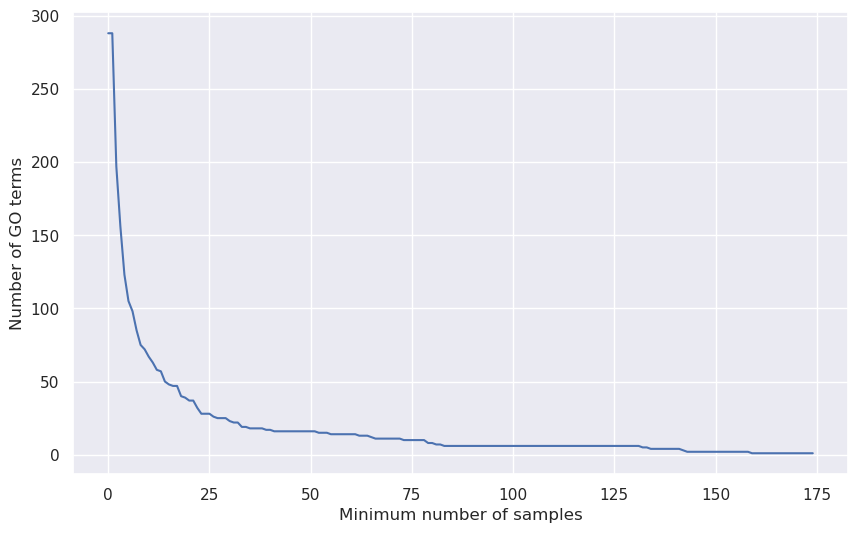

In [30]:
sns.set(rc={"figure.figsize": (10, 6)})

labels_to_proteins_all = get_label_to_proteins(
    df_uniprot_goa,
    min_samples_per_class=0,
    exclude_iea=EXCLUDE_IEA_GO_TERMS,
)
tmp = pd.DataFrame(list(range(175)), columns=["min_samples"])
tmp = tmp.assign(
    num_go_terms=tmp.min_samples.apply(
        lambda x: len(
            {k: v for k, v in labels_to_proteins_all.items() if len(v) >= x}.keys()
        )
    )
)
tmp = tmp.rename(
    columns={
        "num_go_terms": "Number of GO terms",
        "min_samples": "Minimum number of samples",
    }
)
sns.lineplot(tmp, x="Minimum number of samples", y="Number of GO terms")

How many for at least 20 samples?

In [31]:
min_unique_samples_per_class = 20
label_to_proteins = get_label_to_proteins(
    df_uniprot_goa, min_samples_per_class=20, exclude_iea=EXCLUDE_IEA_GO_TERMS
)
print(
    "Number of GO terms with more than 20 samples:", len(set(label_to_proteins.keys()))
)

Number of GO terms with more than 20 samples: 37


Stats on pairs:

In [32]:
records = []
for go_term1, set_proteins1 in label_to_proteins.items():
    for go_term2, set_proteins2 in label_to_proteins.items():
        intersection_set = set_proteins1 & set_proteins2
        unique_proteins1 = set_proteins1 - intersection_set
        unique_proteins2 = set_proteins2 - intersection_set
        enough_unique_samples = (
            len(unique_proteins1) >= min_unique_samples_per_class
            and len(unique_proteins2) >= min_unique_samples_per_class
        )
        records.append([go_term1, go_term2, enough_unique_samples])

df_unique_samples_analysis = pd.DataFrame.from_records(
    records, columns=["go1", "go2", "enough_unique_samples"]
)


go_terms_count = len(set(label_to_proteins.keys()))
print("total number of distince pairs:", go_terms_count**2 - go_terms_count)
print(
    "distinct pairs with enough unique samples in each class",
    df_unique_samples_analysis[
        (df_unique_samples_analysis.go1 != df_unique_samples_analysis.go2)
        & ~df_unique_samples_analysis.enough_unique_samples
    ].shape[0],
)

total number of distince pairs: 1332
distinct pairs with enough unique samples in each class 524


How does sequence clustering impact the stats? 

In [33]:
representatives = cd_hit(
    sequences=df_sequences.sequence,
    identity_threshold=70,
)
df_sequences_clustered = df_sequences.loc[representatives]
df_uniprot_goa_clustered = df_uniprot_goa[df_uniprot_goa.Uniprot.isin(representatives)]
label_to_proteins_clustered = get_label_to_proteins(
    df_uniprot_goa_clustered, min_samples_per_class=20, exclude_iea=EXCLUDE_IEA_GO_TERMS
)
print(
    "Number of GO terms with more than 20 samples:",
    len(set(label_to_proteins_clustered.keys())),
)

cd-hit: clustered 332 sequences into 303 clusters at threshold 70
Number of GO terms with more than 20 samples: 32


## Pairwise ML models

- find label combinations with enough samples

### Testing

Questions:

- Does feature selection improve the scores, and which method to use?
    - Boxplot, mean, median, min, max
    - What are the best parameters for the feature selection methods?
        - Ability to change parameters from the outside?
        - Try no parameters 
- How are these scores impacted by sequence clustering?
- What is the impact of min. number of samples?
    - Number of available GO terms
    - Score vs. min. number of samples

Test parameters:

- at least 20 unique samples per class
- with and without 70%sequence clustering 
- comparing feature selection methods

In [34]:
from subpred.go_prediction import (
    get_model_evaluation_matrix_parallel,
    process_pairwise_eval_results,
)
import pickle

RETRAIN = False

if RETRAIN:
    # 100% is the same as no clustering for the yeast dataset
    test_cases = [  # Multi-parameter models
        ["nofs_cl0", "svc_multi", None, None],
        ["pbest10_cl0", "pbest_svc_multi", None, [10]],  # 160
        ["pbest20_cl0", "pbest_svc_multi", None, [20]],  # 320
        ["pbest50_cl0", "pbest_svc_multi", None, [50]],  # 800
        ["pbestALL_cl0", "pbest_svc_multi", None, [10, 20, 50]],
        ["kbest10_cl0", "kbest_svc_multi", None, [10]],
        ["kbest40_cl0", "kbest_svc_multi", None, [40]],
        ["kbest80_cl0", "kbest_svc_multi", None, [80]],
        ["pca10_cl0", "pca_svc_multi", None, [10]],
        ["pca20_cl0", "pca_svc_multi", None, [20]],
        ["pcaNone_cl0", "pca_svc_multi", None, [None]],
        ["pcaALL_cl0", "pca_svc_multi", None, [10, 20, None]],
        ["nofs_cl70", "svc_multi", 70, None],
        ["pbest10_cl70", "pbest_svc_multi", 70, [10]],  # 160
        ["pbest20_cl70", "pbest_svc_multi", 70, [20]],  # 320
        ["pbest50_cl70", "pbest_svc_multi", 70, [50]],  # 800
        ["pbestALL_cl70", "pbest_svc_multi", 70, [10, 20, 50]],
        ["kbest10_cl70", "kbest_svc_multi", 70, [10]],
        ["kbest40_cl70", "kbest_svc_multi", 70, [40]],
        ["kbest80_cl70", "kbest_svc_multi", 70, [80]],
        ["pca10_cl70", "pca_svc_multi", 70, [10]],
        ["pca20_cl70", "pca_svc_multi", 70, [20]],
        ["pcaNone_cl70", "pca_svc_multi", 70, [None]],
        ["pcaALL_cl70", "pca_svc_multi", 70, [10, 20, None]],
    ]

    ml_models_results = dict()

    for (
        test_name,
        model_name,
        seq_clustering_threshold,
        feature_selection_parameters,
    ) in test_cases:
        print("'" * 60)
        print(test_name)

        if seq_clustering_threshold:
            representatives = cd_hit(
                sequences=df_sequences.sequence,
                identity_threshold=seq_clustering_threshold,
            )
            df_sequences_clustered = df_sequences.loc[representatives]
            df_uniprot_goa_clustered = df_uniprot_goa[
                df_uniprot_goa.Uniprot.isin(representatives)
            ]
        else:
            df_sequences_clustered = df_sequences
            df_uniprot_goa_clustered = df_uniprot_goa

        pairwise_eval_results = get_model_evaluation_matrix_parallel(
            df_sequences_clustered,
            df_uniprot_goa_clustered,
            exclude_iea=EXCLUDE_IEA_GO_TERMS,
            standardize_samples=True,
            multi_output=True,
            min_samples_per_class=20,
            min_unique_samples_per_class=20,
            model_name=model_name,  # kbest_svc_multi, pca_svc_multi
            feature_selection_parameters=feature_selection_parameters,
            n_jobs=-1,
        )

        df_train_results, df_test_results = process_pairwise_eval_results(
            pairwise_eval_results=pairwise_eval_results,
            df_uniprot_goa=df_uniprot_goa_clustered,
            convert_go_ids_to_terms=False,
        )
        ml_models_results[test_name] = [df_train_results, df_test_results]

    with open("ml_models_results.pickle", "wb") as handle:
        pickle.dump(ml_models_results, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open("ml_models_results.pickle", "rb") as handle:
        ml_models_results = pickle.load(handle)

Were all proteins used in the analysis?

- Yes:

In [35]:
def check_protein_coverage(df_ml_res):
    tmp = df_ml_res.T.unstack()
    tmp = tmp[~tmp.isnull()].reset_index().rename(columns={0: "f1_score"})

    go_terms_used = pd.concat([tmp.pos_label, tmp.neg_label]).unique()
    from subpred.go_annotations import get_go_subgraph

    go_isa_mf = get_go_subgraph(load_df("go_obo"))

    get_go_ancestors_tmp = lambda go_id: {go_id} | set(nx.descendants(go_isa_mf, go_id))
    go_terms_used_with_ancestors = set()

    for go_term in go_terms_used:
        go_terms_used_with_ancestors |= get_go_ancestors_tmp(go_term)

    print(
        "proteins annotated with a go term with at least 20 samples (including ancestors)",
        len(
            df_uniprot_goa[
                df_uniprot_goa.go_id_ancestor.isin(go_terms_used_with_ancestors)
            ].Uniprot.unique()
        ),
    )
    print("proteins before", len(df_uniprot_goa.Uniprot.unique()))


check_protein_coverage(ml_models_results["nofs_cl0"][0])

proteins annotated with a go term with at least 20 samples (including ancestors) 332
proteins before 332


#### Analysis and comparison between ML results

Create long df for seaborn:

In [36]:
df_plot_ml = pd.DataFrame(
    columns=["dataset", "feature_selection", "clustering", "f1_score"]
)
for results_name, dfs in sorted(ml_models_results.items()):
    feature_selection_method, clustering_threshold = results_name.split("_cl")
    clustering_threshold = int(clustering_threshold)
    df_results_train, df_results_test = dfs
    f1_train = df_results_train.values.ravel()
    f1_test = df_results_test.values.ravel()
    df_plot_ml_train = pd.DataFrame(
        [
            ["train"] * len(f1_train),
            [feature_selection_method] * len(f1_train),
            [clustering_threshold] * len(f1_train),
            f1_train,
        ],
        index=df_plot_ml.columns,
    ).transpose()
    df_plot_ml_test = pd.DataFrame(
        [
            ["test"] * len(f1_test),
            [feature_selection_method] * len(f1_test),
            [clustering_threshold] * len(f1_test),
            f1_test,
        ],
        index=df_plot_ml.columns,
    ).transpose()
    df_plot_ml = pd.concat([df_plot_ml, df_plot_ml_train, df_plot_ml_test]).reset_index(
        drop=True
    )

Plot with all models:

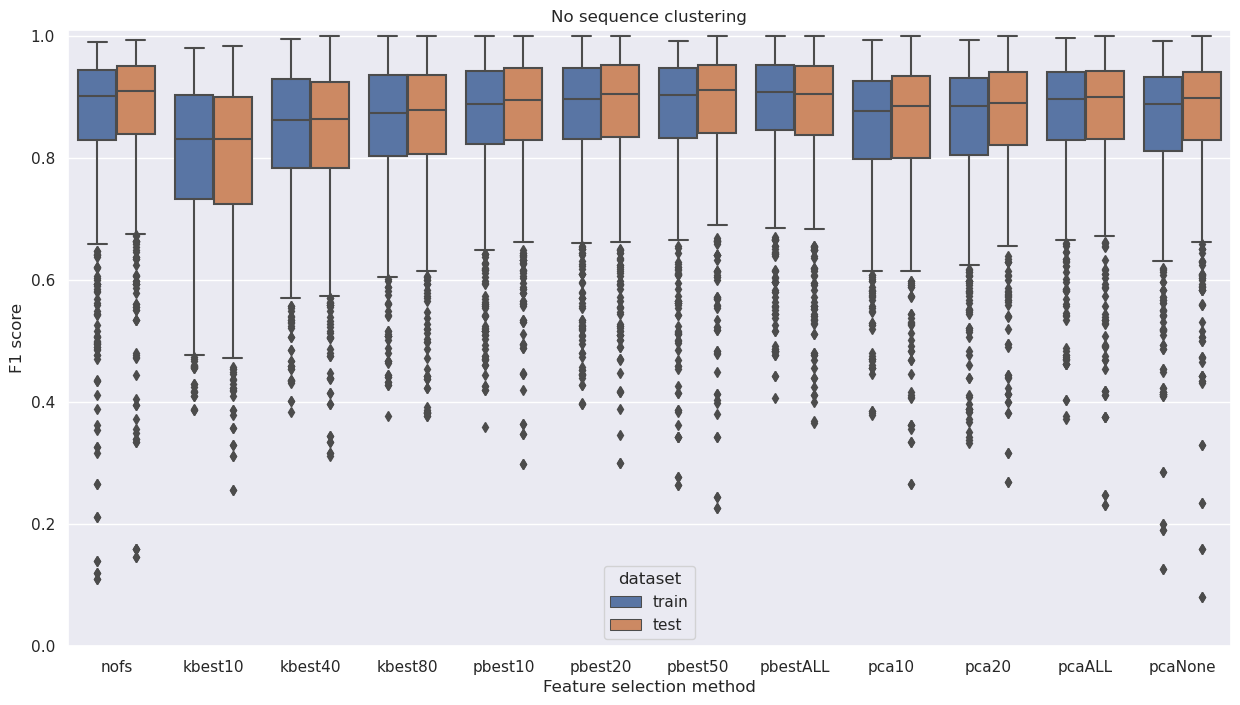

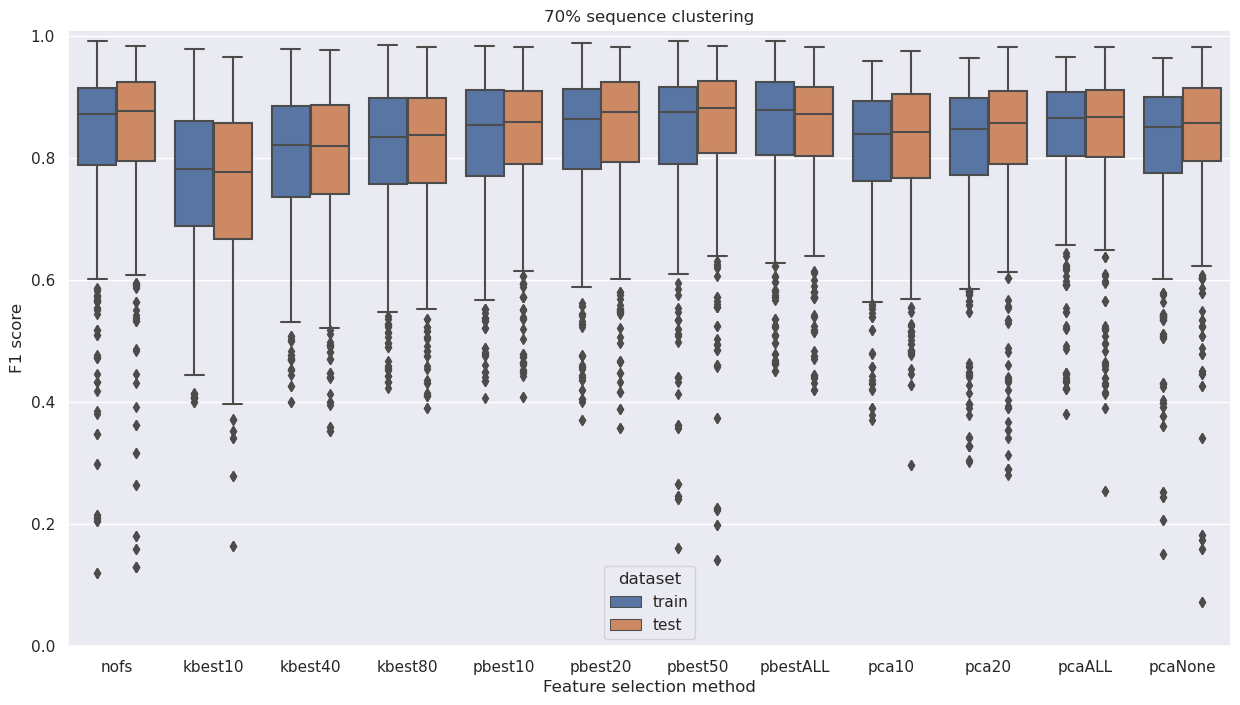

min      mean    median  \
clustering dataset Feature selection method                                 
0          test    kbest10                   0.256699  0.798868  0.831351   
                   kbest40                   0.312255  0.834757  0.864487   
                   kbest80                    0.37671  0.849699      0.88   
                   nofs                      0.146667  0.872025  0.911108   
                   pbest10                   0.298942  0.867873  0.895133   
                   pbest20                   0.300121  0.874929  0.904774   
                   pbest50                   0.226667   0.87865  0.912831   
                   pbestALL                  0.365701  0.875452   0.90475   
                   pca10                     0.266117  0.851514  0.885065   
                   pca20                     0.269565  0.862553  0.891348   
                   pcaALL                    0.230952   0.86891  0.899857   
                   pcaNone                       0.08   0.86532  0.899005   
           train   kbest10                   0.387969  0.806738  0.831715   
                   kbest40                   0.383972  0.838313   0.86243   
                   kbest80                   0.377584  0.850551  0.874484   
                   nofs                          0.11  0.858102  0.901966   
                   pbest10                   0.359311  0.860928  0.889233   
                   pbest20                   0.397634   0.86647  0.897229   
                   pbest50                   0.265094  0.865901   0.90304   
                   pbestALL                  0.406515   0.87988  0.907944   
                   pca10                      0.37944  0.847182  0.877295   
                   pca20                     0.332711  0.849574  0.885004   
                   pcaALL                    0.373318   0.87022  0.897756   
                   pcaNone                   0.126667  0.848734   0.88892   
70         test    kbest10                    0.16381  0.753149  0.776942   
                   kbest40                    0.35368  0.794998  0.820806   
                   kbest80                    0.39009  0.813166  0.838022   
                   nofs                          0.13  0.837649  0.877778   
                   pbest10                    0.40915  0.831137  0.860381   
                   pbest20                   0.357648  0.844332  0.875826   
                   pbest50                   0.141538  0.845765  0.881911   
                   pbestALL                  0.420202  0.843144  0.873142   
                   pca10                     0.297902  0.820497  0.842879   
                   pca20                     0.280952   0.82969  0.858654   
                   pcaALL                    0.255045  0.839657  0.868048   
                   pcaNone                   0.072727  0.827971  0.857182   
           train   kbest10                   0.400104  0.764277   0.78243   
                   kbest40                   0.400125  0.797844  0.822095   
                   kbest80                   0.423803   0.81302  0.834592   
                   nofs                          0.12  0.827588  0.872673   
                   pbest10                   0.406428  0.827026  0.854558   
                   pbest20                   0.371567  0.832797   0.86456   
                   pbest50                   0.160844  0.834333  0.875757   
                   pbestALL                  0.452032  0.849836  0.878731   
                   pca10                     0.371279  0.812115   0.83991   
                   pca20                     0.301548  0.814715  0.848303   
                   pcaALL                    0.380491  0.838052  0.865444   
                   pcaNone                   0.151111  0.812879  0.850587   

                                                  max      sdev  
clustering dataset Feature selection method                      
0          test    kbest10                   0.984615  0.135516  
 

In [37]:
df_plot_ml = df_plot_ml.rename(
    columns={"f1_score": "F1 score", "feature_selection": "Feature selection method"}
)

fs_order = df_plot_ml["Feature selection method"]
fs_order = ["nofs"] + sorted(fs_order[fs_order != "nofs"].unique().tolist())

sns.set(rc={"figure.figsize": (15, 8)})

# Plots of all models
ax = sns.boxplot(
    df_plot_ml[df_plot_ml.clustering == 0],
    x="Feature selection method",
    y="F1 score",
    hue="dataset",
    order=fs_order,
)
ax.set_ylim(0, 1.01)
ax.set_title("No sequence clustering")
plt.show()

ax = sns.boxplot(
    df_plot_ml[df_plot_ml.clustering == 70],
    x="Feature selection method",
    y="F1 score",
    hue="dataset",
    order=fs_order,
)
ax.set_ylim(0, 1.01)
ax.set_title("70% sequence clustering")
plt.show()

display(
    pd.concat(
        [
            df_plot_ml.groupby(["clustering", "dataset", "Feature selection method"])
            .min()
            .rename(columns={"F1 score": "min"}),
            df_plot_ml.groupby(["clustering", "dataset", "Feature selection method"])
            .mean()
            .rename(columns={"F1 score": "mean"}),
            df_plot_ml.groupby(["clustering", "dataset", "Feature selection method"])
            .median()
            .rename(columns={"F1 score": "median"}),
            df_plot_ml.groupby(["clustering", "dataset", "Feature selection method"])
            .max()
            .rename(columns={"F1 score": "max"}),
            df_plot_ml.groupby(["clustering", "dataset", "Feature selection method"])
            .std()
            .rename(columns={"F1 score": "sdev"}),
        ],
        axis=1,
    )
)

Plots for paper:

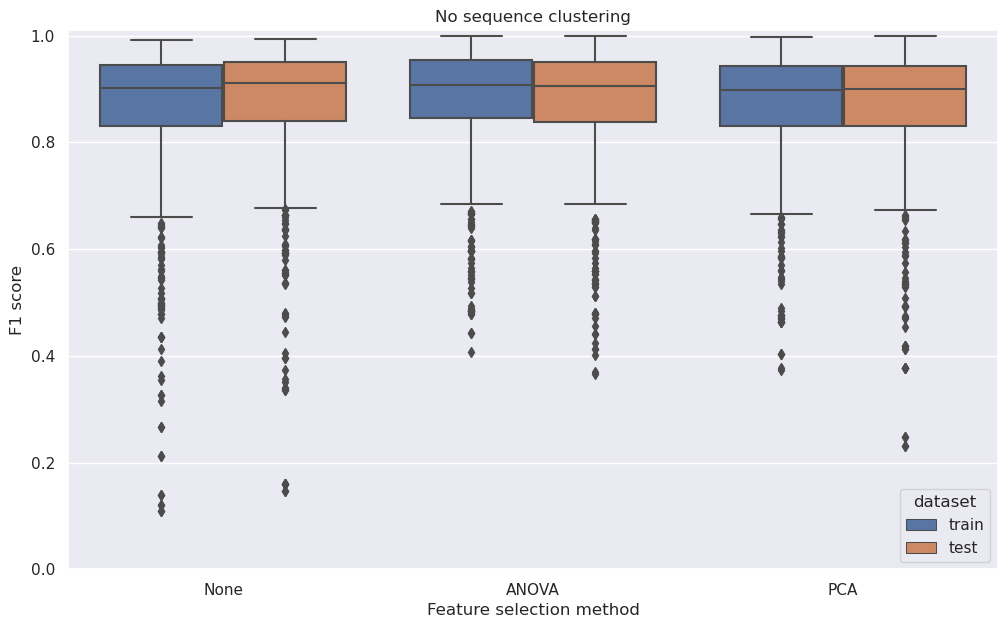

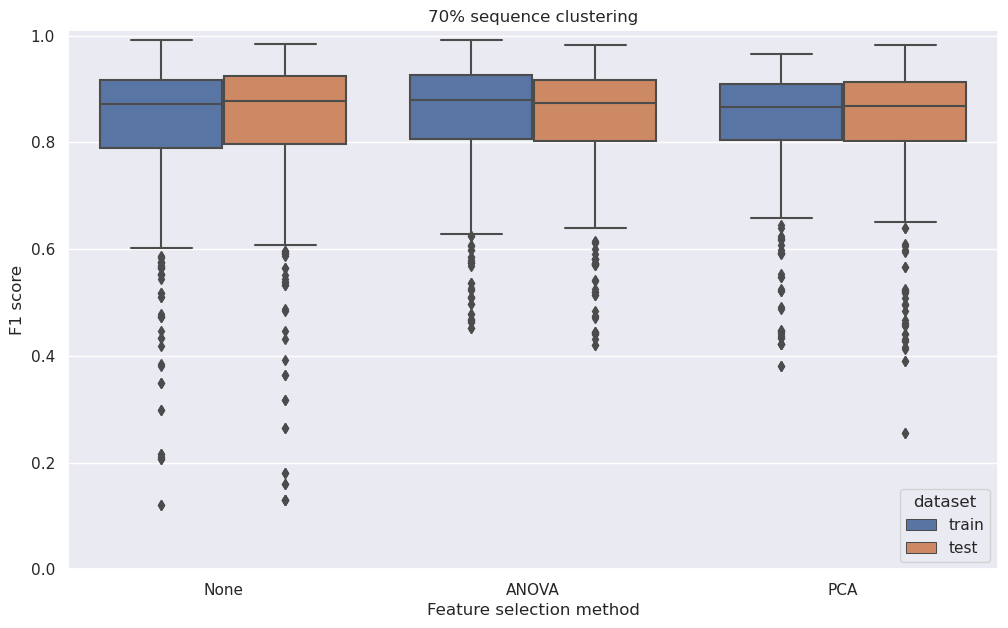

min      mean    median  \
clustering dataset Feature selection method                                 
0          test    ANOVA                     0.365701  0.875452   0.90475   
                   None                      0.146667  0.872025  0.911108   
                   PCA                       0.230952   0.86891  0.899857   
           train   ANOVA                     0.406515   0.87988  0.907944   
                   None                          0.11  0.858102  0.901966   
                   PCA                       0.373318   0.87022  0.897756   
70         test    ANOVA                     0.420202  0.843144  0.873142   
                   None                          0.13  0.837649  0.877778   
                   PCA                       0.255045  0.839657  0.868048   
           train   ANOVA                     0.452032  0.849836  0.878731   
                   None                          0.12  0.827588  0.872673   
                   PCA                       0.380491  0.838052  0.865444   

                                                  max      sdev  
clustering dataset Feature selection method                      
0          test    ANOVA                          1.0  0.111613  
                   None                      0.993939  0.127663  
                   PCA                            1.0  0.115716  
           train   ANOVA                          1.0  0.106542  
                   None                      0.990909  0.139763  
                   PCA                       0.997059  0.103799  
70         test    ANOVA                     0.982609  0.110068  
                   None                      0.984615  0.141148  
                   PCA                       0.981781  0.114324  
           train   ANOVA                     0.992308  0.109766  
                   None                      0.992308  0.142523  
                   PCA                       0.966328  0.108803

In [38]:
sns.set(rc={"figure.figsize": (12.0, 7.0)})

# Plots of only three models for paper
df_plot_ml_best_models = df_plot_ml[
    df_plot_ml["Feature selection method"].isin({"nofs", "pcaALL", "pbestALL"})
]
df_plot_ml_best_models.loc[:, "Feature selection method"] = df_plot_ml_best_models[
    "Feature selection method"
].map({"nofs": "None", "pcaALL": "PCA", "pbestALL": "ANOVA"})

ax = sns.boxplot(
    df_plot_ml_best_models[df_plot_ml_best_models.clustering == 0],
    x="Feature selection method",
    y="F1 score",
    hue="dataset",
    order=["None", "ANOVA", "PCA"],
)
ax.set_ylim(0, 1.01)
ax.set_title("No sequence clustering")
plt.show()

ax = sns.boxplot(
    df_plot_ml_best_models[df_plot_ml_best_models.clustering == 70],
    x="Feature selection method",
    y="F1 score",
    hue="dataset",
    order=["None", "ANOVA", "PCA"],
)
ax.set_ylim(0, 1.01)
ax.set_title("70% sequence clustering")
plt.show()

df_plot_ml_best_models_stats = pd.concat(
    [
        df_plot_ml_best_models.groupby(
            ["clustering", "dataset", "Feature selection method"]
        )
        .min()
        .rename(columns={"F1 score": "min"}),
        df_plot_ml_best_models.groupby(
            ["clustering", "dataset", "Feature selection method"]
        )
        .mean()
        .rename(columns={"F1 score": "mean"}),
        df_plot_ml_best_models.groupby(
            ["clustering", "dataset", "Feature selection method"]
        )
        .median()
        .rename(columns={"F1 score": "median"}),
        df_plot_ml_best_models.groupby(
            ["clustering", "dataset", "Feature selection method"]
        )
        .max()
        .rename(columns={"F1 score": "max"}),
        df_plot_ml_best_models.groupby(
            ["clustering", "dataset", "Feature selection method"]
        )
        .std()
        .rename(columns={"F1 score": "sdev"}),
    ],
    axis=1,
)
display(df_plot_ml_best_models_stats)

In [39]:
df_plot_ml_best_models_stats = (
    df_plot_ml_best_models_stats.reindex(["None", "ANOVA", "PCA"], level=2)
    .reindex(["train", "test"], level=1)
    .rename(index={0: "None"})
)
df_plot_ml_best_models_stats.index = df_plot_ml_best_models_stats.index.rename(
    ["Clustering", "Dataset", "Method"]
)
display(df_plot_ml_best_models_stats)
print(df_plot_ml_best_models_stats.to_latex(float_format="%.2f"))

min      mean    median       max      sdev
Clustering Dataset Method                                                  
None       train   None        0.11  0.858102  0.901966  0.990909  0.139763
                   ANOVA   0.406515   0.87988  0.907944       1.0  0.106542
                   PCA     0.373318   0.87022  0.897756  0.997059  0.103799
           test    None    0.146667  0.872025  0.911108  0.993939  0.127663
                   ANOVA   0.365701  0.875452   0.90475       1.0  0.111613
                   PCA     0.230952   0.86891  0.899857       1.0  0.115716
70         train   None        0.12  0.827588  0.872673  0.992308  0.142523
                   ANOVA   0.452032  0.849836  0.878731  0.992308  0.109766
                   PCA     0.380491  0.838052  0.865444  0.966328  0.108803
           test    None        0.13  0.837649  0.877778  0.984615  0.141148
                   ANOVA   0.420202  0.843144  0.873142  0.982609  0.110068
                   PCA     0.255045  0.839657  0.868048  0.981781  0.114324

\begin{tabular}{lllllllr}
\toprule
 &  &  & min & mean & median & max & sdev \\
Clustering & Dataset & Method &  &  &  &  &  \\
\midrule
\multirow[t]{6}{*}{None} & \multirow[t]{3}{*}{train} & None & 0.11 & 0.86 & 0.90 & 0.99 & 0.14 \\
 &  & ANOVA & 0.41 & 0.88 & 0.91 & 1.00 & 0.11 \\
 &  & PCA & 0.37 & 0.87 & 0.90 & 1.00 & 0.10 \\
\cline{2-8}
 & \multirow[t]{3}{*}{test} & None & 0.15 & 0.87 & 0.91 & 0.99 & 0.13 \\
 &  & ANOVA & 0.37 & 0.88 & 0.90 & 1.00 & 0.11 \\
 &  & PCA & 0.23 & 0.87 & 0.90 & 1.00 & 0.12 \\
\cline{1-8} \cline{2-8}
\multirow[t]{6}{*}{70} & \multirow[t]{3}{*}{train} & None & 0.12 & 0.83 & 0.87 & 0.99 & 0.14 \\
 &  & ANOVA & 0.45 & 0.85 & 0.88 & 0.99 & 0.11 \\
 &  & PCA & 0.38 & 0.84 & 0.87 & 0.97 & 0.11 \\
\cline{2-8}
 & \multirow[t]{3}{*}{test} & None & 0.13 & 0.84 & 0.88 & 0.98 & 0.14 \\
 &  & ANOVA & 0.42 & 0.84 & 0.87 & 0.98 & 0.11 \\
 &  & PCA & 0.26 & 0.84 & 0.87 & 0.98 & 0.11 \\
\cline{1-8} \cline{2-8}
\bottomrule
\end{tabular}



PBest and KBest perform very similar, which makes sense since they do the same thing but with different thresholds.

## Selecting the best model for analysis

In [40]:
df_train_results, df_test_results = ml_models_results["pbestALL_cl0"]

## Data assembly

### Datasets

- GO terms that are directly related vs. not
- GO terms that have a common parent vs. not
- GO terms that have a common ancestor vs. not (need to set depth limit, otherwise they all do)
- GO terms that a tanimoto coefficient above 0.5 (or other threshold) vs. below
- GO terms with max/median sequence identity

### Comparisons

- SVM scores
- Sequence identities (max, median)
- Overlaps in protein annotation
- Overlaps in chebi annotation

### Other ideas:

- Compare different ways to divide the transporter GO tree
- One of the scores on y axis, the rest in violin plot
    - Violin plots or similar

In [41]:
# Dataframes: for parameters:
# ORGANISM_IDS={559292}
# SWISSPROT_ONLY=False
# MAX_SEQUENCE_EVIDENCE_CODE = 1
# EXCLUDE_IEA_GO_TERMS=False

df_sequences  #  332 x   5
df_uniprot_goa  # 7737 x   8, 211 direct annot, 288 with ancestors
df_go_chebi  #  384 x   5, primary substrate chebi terms: 159

df_adj_matrix_go  #  288 x 288
df_go_overlaps  #  288 x 288
# df_semantic_similarity_wang  #  288 x 288
dict_semsim_matrices

dict_pairwise_alignment_scores  #  288 x 288

dict_tanimoto_matrices_go  #  131 x 131

df_adj_matrix_chebi  #  159 x 159
df_chebi_overlaps  #  159 x 159
dict_tanimoto_matrices_chebi  #   89 x  89

df_train_results  #   36 x  36, sparse, asymetrical
df_test_results  #   36 x  36, sparse, asymetrical
pass

In [42]:
print("unique proteins:", df_sequences.index.unique().shape[0])
print("unique directly annotated go terms:", df_uniprot_goa.go_id.unique().shape[0])
print("unique annotated go terms:", df_uniprot_goa.go_id_ancestor.unique().shape[0])
print("GO terms annotated with ChEBI terms", df_go_chebi.go_id.unique().shape[0])
print("Unique ChEBI terms", df_go_chebi.chebi_id.unique().shape[0])
print(
    "Unique ChEBI terms usable for Tanimoto:",
    dict_tanimoto_matrices_chebi["tanimoto_atompairs"].index.unique().shape[0],
)

unique proteins: 332
unique directly annotated go terms: 211
unique annotated go terms: 288
GO terms annotated with ChEBI terms 225
Unique ChEBI terms 181
Unique ChEBI terms usable for Tanimoto: 89


### What determines good classification performance?

In [43]:
def get_sparse_matrix(df_ml_results, dataset_name: str, mean: bool = True):
    df_ml_results_sparse = df_ml_results.T.unstack().reset_index(
        name=f"{dataset_name}_score"
    )
    df_ml_results_sparse = df_ml_results_sparse[
        ~df_ml_results_sparse[f"{dataset_name}_score"].isnull()
    ].reset_index(drop=True)
    if mean:
        df_ml_results_sparse = (
            pd.DataFrame(
                [
                    sorted([go_pos, go_neg]) + [score]
                    for go_pos, go_neg, score in df_ml_results_sparse.values
                ],
                columns=["go_id1", "go_id2", f"mean_{dataset_name}_score"],
            )
            .groupby(["go_id1", "go_id2"])
            .agg("mean")
            .reset_index()
        )

    return df_ml_results_sparse

In [44]:
df_test_results_sparse = get_sparse_matrix(df_test_results, "test", mean=True)
df_train_results_sparse = get_sparse_matrix(df_train_results, "train", mean=True)

df_matrices_long = pd.merge(df_train_results_sparse, df_test_results_sparse)
df_matrices_long

,go_id1,go_id2,mean_train_score,mean_test_score
0,GO:0005342,GO:0005351,0.968188,0.982011
1,GO:0005342,GO:0005402,0.968188,0.982011
2,GO:0005342,GO:0008320,0.897621,0.916218
3,GO:0005342,GO:0008324,0.855650,0.828958
4,GO:0005342,GO:0015075,0.859569,0.844257
...,...,...,...,...
399,GO:0046915,GO:0046943,0.881146,0.864668
400,GO:0046915,GO:1901505,0.880359,0.871197
401,GO:0046943,GO:1901505,0.722366,0.740920
402,GO:0046943,GO:1901702,0.862248,0.888908


In [45]:
go_term_to_sample_count = (
    df_uniprot_goa[["go_id_ancestor", "Uniprot"]]
    .drop_duplicates()
    .groupby("go_id_ancestor")
    .apply(len)
    .to_dict()
)
# df_matrices_long["class1_n_samples"] = df_matrices_long.go_id1.map(
#     go_term_to_sample_count
# )
# df_matrices_long["class2_n_samples"] = df_matrices_long.go_id2.map(
#     go_term_to_sample_count
# )

df_matrices_long["sample_count_diff"] = (
    df_matrices_long.go_id1.map(go_term_to_sample_count)
    - df_matrices_long.go_id2.map(go_term_to_sample_count)
).abs()

df_matrices_long

,go_id1,go_id2,mean_train_score,mean_test_score,sample_count_diff
0,GO:0005342,GO:0005351,0.968188,0.982011,43
1,GO:0005342,GO:0005402,0.968188,0.982011,43
2,GO:0005342,GO:0008320,0.897621,0.916218,44
3,GO:0005342,GO:0008324,0.855650,0.828958,66
4,GO:0005342,GO:0015075,0.859569,0.844257,77
...,...,...,...,...,...
399,GO:0046915,GO:0046943,0.881146,0.864668,35
400,GO:0046915,GO:1901505,0.880359,0.871197,4
401,GO:0046943,GO:1901505,0.722366,0.740920,39
402,GO:0046943,GO:1901702,0.862248,0.888908,8


In [46]:
df_matrices_long["overlap"] = df_matrices_long.apply(
    lambda row: df_go_overlaps.at[row.go_id1, row.go_id2], axis=1
)
# df_matrices_long["semantic_sim_wang"] = df_matrices_long.apply(
#     lambda row: df_semantic_similarity_wang.at[row.go_id1, row.go_id2], axis=1
# )
for semsim_method, semantic_similarity_matrix in dict_semsim_matrices.items():
    df_matrices_long[f"semantic_similarity_{semsim_method}"] = df_matrices_long.apply(
        lambda row: semantic_similarity_matrix.at[row.go_id1, row.go_id2], axis=1
    )


for matrix_name, alignment_score_matrix in dict_pairwise_alignment_scores.items():
    df_matrices_long[matrix_name] = df_matrices_long.apply(
        lambda row: alignment_score_matrix.at[row.go_id1, row.go_id2], axis=1
    )

#### node degree

In [47]:
network_go = load_df("go_obo")
# labels_count_dict = (
#     df_uniprot_goa[["go_id_ancestor", "Uniprot"]]
#     .drop_duplicates()
#     .groupby("go_id_ancestor")
#     .apply(len)
#     .to_dict()
# )

go_ids = set(df_uniprot_goa.go_id_ancestor.unique())
# labels_count_dict = {k:v for k,v in labels_count_dict.items() if v >= MIN_COUNT}
network_go = network_go.subgraph(nodes=go_ids)

network_go = network_go.edge_subgraph(
    [(a, b, k) for a, b, k in network_go.edges(keys=True) if k == "is_a"]
)

go_id_to_degree = {go_id: network_go.degree(go_id) for go_id in go_ids}
df_matrices_long["degree_diff"] = df_matrices_long.apply(
    lambda row: abs(go_id_to_degree[row.go_id1] - go_id_to_degree[row.go_id2]), axis=1
)

go_id_to_in_degree = {go_id: network_go.in_degree(go_id) for go_id in go_ids}
df_matrices_long["in_degree_diff"] = df_matrices_long.apply(
    lambda row: abs(go_id_to_in_degree[row.go_id1] - go_id_to_in_degree[row.go_id2]),
    axis=1,
)

go_id_to_out_degree = {go_id: network_go.out_degree(go_id) for go_id in go_ids}
df_matrices_long["out_degree_diff"] = df_matrices_long.apply(
    lambda row: abs(go_id_to_out_degree[row.go_id1] - go_id_to_out_degree[row.go_id2]),
    axis=1,
)

df_matrices_long

,go_id1,go_id2,mean_train_score,mean_test_score,sample_count_diff,overlap,semantic_similarity_Resnik,semantic_similarity_Lin,semantic_similarity_Rel,semantic_similarity_Jiang,semantic_similarity_Wang,go_median_sequence_identity,go_mean_sequence_identity,go_max_sequence_identity,go_min_sequence_identity,degree_diff,in_degree_diff,out_degree_diff
0,GO:0005342,GO:0005351,0.968188,0.982011,43,0,0.299,0.509,0.485,0.424,0.297,13.993389,13.668233,18.485915,5.242464,0,1,1
1,GO:0005342,GO:0005402,0.968188,0.982011,43,0,0.299,0.509,0.485,0.424,0.346,13.993389,13.668233,18.485915,5.242464,0,1,1
2,GO:0005342,GO:0008320,0.897621,0.916218,44,0,0.299,0.537,0.511,0.485,0.463,13.265306,12.578896,21.568627,2.437460,1,1,0
3,GO:0005342,GO:0008324,0.855650,0.828958,66,4,0.299,0.657,0.625,0.688,0.527,13.333333,12.665351,100.000000,1.328502,3,3,0
4,GO:0005342,GO:0015075,0.859569,0.844257,77,5,0.299,0.662,0.631,0.695,0.689,13.363794,12.715393,100.000000,1.328502,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,GO:0046915,GO:0046943,0.881146,0.864668,35,2,0.299,0.555,0.528,0.521,0.406,13.467174,13.202828,100.000000,3.014753,3,2,1
400,GO:0046915,GO:1901505,0.880359,0.871197,4,0,0.299,0.514,0.490,0.436,0.305,13.605442,13.404514,23.475610,6.478512,1,1,0
401,GO:0046943,GO:1901505,0.722366,0.740920,39,3,0.299,0.556,0.530,0.524,0.531,14.119762,14.297311,100.000000,5.293441,2,1,1
402,GO:0046943,GO:1901702,0.862248,0.888908,8,18,0.299,0.616,0.587,0.628,0.484,13.711987,13.730713,100.000000,2.991663,16,17,1


#### Adding Tanomito

Not used, since not available for most pairs

In [48]:
INCLUDE_TANIMOTO = False

if INCLUDE_TANIMOTO:
    for name, df_tanimoto_go in dict_tanimoto_matrices_go.items():
        df_matrices_long = df_matrices_long.merge(
            df_tanimoto_go.unstack().reset_index(name=name),
            how="left",
            on=["go_id1", "go_id2"],
        )

In [49]:
df_matrices_long

,go_id1,go_id2,mean_train_score,mean_test_score,sample_count_diff,overlap,semantic_similarity_Resnik,semantic_similarity_Lin,semantic_similarity_Rel,semantic_similarity_Jiang,semantic_similarity_Wang,go_median_sequence_identity,go_mean_sequence_identity,go_max_sequence_identity,go_min_sequence_identity,degree_diff,in_degree_diff,out_degree_diff
0,GO:0005342,GO:0005351,0.968188,0.982011,43,0,0.299,0.509,0.485,0.424,0.297,13.993389,13.668233,18.485915,5.242464,0,1,1
1,GO:0005342,GO:0005402,0.968188,0.982011,43,0,0.299,0.509,0.485,0.424,0.346,13.993389,13.668233,18.485915,5.242464,0,1,1
2,GO:0005342,GO:0008320,0.897621,0.916218,44,0,0.299,0.537,0.511,0.485,0.463,13.265306,12.578896,21.568627,2.437460,1,1,0
3,GO:0005342,GO:0008324,0.855650,0.828958,66,4,0.299,0.657,0.625,0.688,0.527,13.333333,12.665351,100.000000,1.328502,3,3,0
4,GO:0005342,GO:0015075,0.859569,0.844257,77,5,0.299,0.662,0.631,0.695,0.689,13.363794,12.715393,100.000000,1.328502,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,GO:0046915,GO:0046943,0.881146,0.864668,35,2,0.299,0.555,0.528,0.521,0.406,13.467174,13.202828,100.000000,3.014753,3,2,1
400,GO:0046915,GO:1901505,0.880359,0.871197,4,0,0.299,0.514,0.490,0.436,0.305,13.605442,13.404514,23.475610,6.478512,1,1,0
401,GO:0046943,GO:1901505,0.722366,0.740920,39,3,0.299,0.556,0.530,0.524,0.531,14.119762,14.297311,100.000000,5.293441,2,1,1
402,GO:0046943,GO:1901702,0.862248,0.888908,8,18,0.299,0.616,0.587,0.628,0.484,13.711987,13.730713,100.000000,2.991663,16,17,1


## Analysis 2

#### Preparation

In [50]:
df_analysis = df_matrices_long.copy()
# add go terms
go_id_to_term = {k: v for k, v in load_df("go_obo").nodes(data="name")}
df_analysis.insert(2, "go_term1", df_analysis.go_id1.map(go_id_to_term))
df_analysis.insert(3, "go_term2", df_analysis.go_id2.map(go_id_to_term))
df_analysis.isna().any().any()

False

### Which GO term pairs have the lowest scores?

In [51]:
tmp = (
    df_analysis[df_analysis.mean_test_score < 0.75][["go_term1", "go_term2"]]
    .sort_values(["go_term1", "go_term2"])
    .reset_index(drop=True)
)
print(
    pd.DataFrame(
        tmp.apply(lambda row: sorted(row), axis=1).tolist(),
        columns=["GO term 1", "GO term 2"],
    )
    .sort_values(["GO term 1", "GO term 2"])
    .reset_index(drop=True)
    .to_latex()
)

\begin{tabular}{lll}
\toprule
 & GO term 1 & GO term 2 \\
\midrule
0 & active monoatomic ion transmembrane transporter activity & channel activity \\
1 & active monoatomic ion transmembrane transporter activity & macromolecule transmembrane transporter activity \\
2 & active monoatomic ion transmembrane transporter activity & passive transmembrane transporter activity \\
3 & active monoatomic ion transmembrane transporter activity & protein transmembrane transporter activity \\
4 & active transmembrane transporter activity & channel activity \\
5 & active transmembrane transporter activity & passive transmembrane transporter activity \\
6 & active transmembrane transporter activity & transition metal ion transmembrane transporter activity \\
7 & antiporter activity & carboxylic acid transmembrane transporter activity \\
8 & antiporter activity & inorganic cation transmembrane transporter activity \\
9 & antiporter activity & inorganic molecular entity transmembrane transporter activity

Pairs of GO terms. Machine learning scores when trying to do a binary classification between proteins annotated with term A, and proteins annotated with term B. 

### Statistical tests: 

- Which variables have a significant difference between low-performing pairs and high-performing pairs?

In [52]:
# Does the df contain any duplicated pairs?
assert (
    not df_analysis[["go_id1", "go_id2"]]
    .apply(lambda row: sorted([row.go_id1, row.go_id2]), axis=1)
    .duplicated()
    .any()
)

In [53]:
from scipy.stats import ttest_ind, ttest_1samp, ranksums
from scipy.stats import shapiro
from statsmodels.stats.descriptivestats import sign_test

# pairs = index, only numeric values
df_ttest = pd.concat(
    [
        df_analysis.go_id1.str.cat(df_analysis.go_id2, sep="|").rename("go_pair"),
        df_analysis.select_dtypes(include="number"),
    ],
    axis=1,
).set_index("go_pair")
ttest_records = list()
ttest_records_header = [
    "score",
    "low_scores_cutoff",
    "n_samples_low",
    "n_samples_high",
    "shapiro_stat",
    "shapiro_p",
    "p_1samp_twosided",
    "p_1samp_less",
    "p_1samp_greater",
    "p_1samp_nonparam",
    "p_welch_less",
    "p_welch_greater",
    "p_mannwhitneyU_less",
    "p_mannwhitneyU_greater",  # https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test
    "p_mannwhitneyU_twosided",
]
# low_scores_cutoff = 0.7
for low_scores_cutoff in [0.7, 0.75, 0.8, 0.9]:
    for col_name in df_ttest.columns:
        values_low = df_ttest.loc[
            df_ttest.mean_test_score < low_scores_cutoff, col_name
        ]
        values_high = df_ttest.loc[
            df_ttest.mean_test_score >= low_scores_cutoff, col_name
        ]

        # The GOSemSim dfs for all terms contained a few NA values, are they used here?
        assert not values_low.isnull().any()
        assert not values_high.isnull().any()
        # If error: remove respective column from calc. (continue)

        pop_mean = values_high.mean()

        shapiro_stat, shapiro_p = shapiro(df_ttest[col_name].values)

        # H0: the expected mean value of the sample is equal to the mean value of the population

        # H1: the mean of the pairs with low F1 score is less than the mean of the population (all scores)
        p_1samp_less = ttest_1samp(values_low, pop_mean, alternative="less")[1]
        # H1: the mean of the pairs with low F1 score is greater than the mean of the population (all scores)
        p_1samp_greater = ttest_1samp(values_low, pop_mean, alternative="greater")[1]
        # H1: the mean of the pairs with low F1 score is different than the mean of the population (all scores)
        p_1samp_twosided = ttest_1samp(values_low, pop_mean, alternative="two-sided")[1]

        p_1samp_nonparam = sign_test(samp=values_low, mu0=pop_mean)[1]

        # H1: the mean of pairs with low score is less than the mean of pairs with high score
        p_welch_less = ttest_ind(
            values_low, values_high, equal_var=False, alternative="less"
        )[1]
        # H1: the mean of pairs with low score is greater than the mean of pairs with high score
        p_welch_greater = ttest_ind(
            values_low, values_high, equal_var=False, alternative="greater"
        )[1]

        p_mannwhitneyU_less = ranksums(values_low, values_high, alternative="less")[1]
        p_mannwhitneyU_greater = ranksums(
            values_low, values_high, alternative="greater"
        )[1]
        p_mannwhitneyU = ranksums(values_low, values_high, alternative="two-sided")[1]

        ttest_records.append(
            [
                col_name,
                low_scores_cutoff,
                len(values_low),
                len(values_high),
                shapiro_stat,
                shapiro_p,
                p_1samp_twosided,
                p_1samp_less,
                p_1samp_greater,
                p_1samp_nonparam,
                p_welch_less,
                p_welch_greater,
                p_mannwhitneyU_less,
                p_mannwhitneyU_greater,
                p_mannwhitneyU,
            ]
        )

df_ttest_results = pd.DataFrame(ttest_records, columns=ttest_records_header)
df_ttest_results = df_ttest_results[df_ttest_results.low_scores_cutoff == 0.75]

/home/andy/mambaforge/envs/subpred4/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [54]:
from statsmodels.stats.multitest import multipletests

for col_name in df_ttest_results.columns:
    if not col_name.startswith("p_"):
        continue
    for corr_method in ["bonferroni", "fdr_bh"]:
        df_ttest_results[col_name + "_" + corr_method] = multipletests(
            df_ttest_results[col_name], method=corr_method
        )[1]

In [55]:
df_ttest_results[(df_ttest_results.shapiro_stat > 0.90)].round(4)[
    [
        "score",
        "low_scores_cutoff",
        "n_samples_low",
        "n_samples_high",
        "shapiro_stat",
        "shapiro_p",
    ]
]

,score,low_scores_cutoff,n_samples_low,n_samples_high,shapiro_stat,shapiro_p
16,mean_train_score,0.75,35,369,0.9412,0.0000
17,mean_test_score,0.75,35,369,0.9369,0.0000
21,semantic_similarity_Lin,0.75,35,369,0.9126,0.0000
23,semantic_similarity_Jiang,0.75,35,369,0.9883,0.0025
24,semantic_similarity_Wang,0.75,35,369,0.9581,0.0000
25,go_median_sequence_identity,0.75,35,369,0.9113,0.0000
26,go_mean_sequence_identity,0.75,35,369,0.9872,0.0012


In [56]:
df_ttest_results[
    (
        (df_ttest_results.p_1samp_less_bonferroni <= 0.05)
        | (df_ttest_results.p_1samp_greater_bonferroni <= 0.05)
    )
    & (df_ttest_results.shapiro_stat > 0.90)
].round(4)[
    [
        "score",
        "low_scores_cutoff",
        "n_samples_low",
        "n_samples_high",
        "shapiro_stat",
        "shapiro_p",
        "p_1samp_less_bonferroni",
        "p_1samp_greater_bonferroni",
    ]
]

,score,low_scores_cutoff,n_samples_low,n_samples_high,shapiro_stat,shapiro_p,p_1samp_less_bonferroni,p_1samp_greater_bonferroni
16,mean_train_score,0.75,35,369,0.9412,0.0,0.0000,1.0
17,mean_test_score,0.75,35,369,0.9369,0.0,0.0000,1.0
21,semantic_similarity_Lin,0.75,35,369,0.9126,0.0,0.0163,1.0


In [57]:
df_ttest_results[
    (
        (df_ttest_results.p_1samp_less_fdr_bh <= 0.05)
        | (df_ttest_results.p_1samp_greater_fdr_bh <= 0.05)
    )
    & (df_ttest_results.shapiro_stat > 0.90)
].round(4)[
    [
        "score",
        "low_scores_cutoff",
        "n_samples_low",
        "n_samples_high",
        "shapiro_stat",
        "shapiro_p",
        "p_1samp_less_fdr_bh",
        "p_1samp_greater_fdr_bh",
    ]
]

,score,low_scores_cutoff,n_samples_low,n_samples_high,shapiro_stat,shapiro_p,p_1samp_less_fdr_bh,p_1samp_greater_fdr_bh
16,mean_train_score,0.75,35,369,0.9412,0.0000,0.0000,1.0
17,mean_test_score,0.75,35,369,0.9369,0.0000,0.0000,1.0
21,semantic_similarity_Lin,0.75,35,369,0.9126,0.0000,0.0016,1.0
26,go_mean_sequence_identity,0.75,35,369,0.9872,0.0012,0.0306,1.0


In [58]:
df_ttest_results[((df_ttest_results.p_mannwhitneyU_less_fdr_bh <= 0.05))].round(4)[
    [
        "score",
        "low_scores_cutoff",
        "n_samples_low",
        "n_samples_high",
        "shapiro_stat",
        "shapiro_p",
        "p_mannwhitneyU_less_fdr_bh",
    ]
]

,score,low_scores_cutoff,n_samples_low,n_samples_high,shapiro_stat,shapiro_p,p_mannwhitneyU_less_fdr_bh
16,mean_train_score,0.75,35,369,0.9412,0.0000,0.000
17,mean_test_score,0.75,35,369,0.9369,0.0000,0.000
26,go_mean_sequence_identity,0.75,35,369,0.9872,0.0012,0.020
28,go_min_sequence_identity,0.75,35,369,0.8357,0.0000,0.020
29,degree_diff,0.75,35,369,0.8330,0.0000,0.020
30,in_degree_diff,0.75,35,369,0.8191,0.0000,0.020
31,out_degree_diff,0.75,35,369,0.7148,0.0000,0.046


In [59]:
df_ttest_results[((df_ttest_results.p_mannwhitneyU_greater_fdr_bh <= 0.05))].round(4)[
    [
        "score",
        "low_scores_cutoff",
        "n_samples_low",
        "n_samples_high",
        "shapiro_stat",
        "shapiro_p",
        "p_mannwhitneyU_greater_fdr_bh",
    ]
]

,score,low_scores_cutoff,n_samples_low,n_samples_high,shapiro_stat,shapiro_p,p_mannwhitneyU_greater_fdr_bh
18,sample_count_diff,0.75,35,369,0.8388,0.0,0.0000
24,semantic_similarity_Wang,0.75,35,369,0.9581,0.0,0.0453
27,go_max_sequence_identity,0.75,35,369,0.6556,0.0,0.0223


In [60]:
df_ttest_results[((df_ttest_results.p_mannwhitneyU_twosided_fdr_bh <= 0.05))].round(4)[
    [
        "score",
        "low_scores_cutoff",
        "n_samples_low",
        "n_samples_high",
        "shapiro_stat",
        "shapiro_p",
        "p_mannwhitneyU_twosided_fdr_bh",
    ]
]

,score,low_scores_cutoff,n_samples_low,n_samples_high,shapiro_stat,shapiro_p,p_mannwhitneyU_twosided_fdr_bh
16,mean_train_score,0.75,35,369,0.9412,0.0000,0.0000
17,mean_test_score,0.75,35,369,0.9369,0.0000,0.0000
18,sample_count_diff,0.75,35,369,0.8388,0.0000,0.0000
24,semantic_similarity_Wang,0.75,35,369,0.9581,0.0000,0.0302
26,go_mean_sequence_identity,0.75,35,369,0.9872,0.0012,0.0277
27,go_max_sequence_identity,0.75,35,369,0.6556,0.0000,0.0223
28,go_min_sequence_identity,0.75,35,369,0.8357,0.0000,0.0240
29,degree_diff,0.75,35,369,0.8330,0.0000,0.0300
30,in_degree_diff,0.75,35,369,0.8191,0.0000,0.0300


In [61]:
df_ttest_results.score.shape[0] - 2

14

<Axes: >

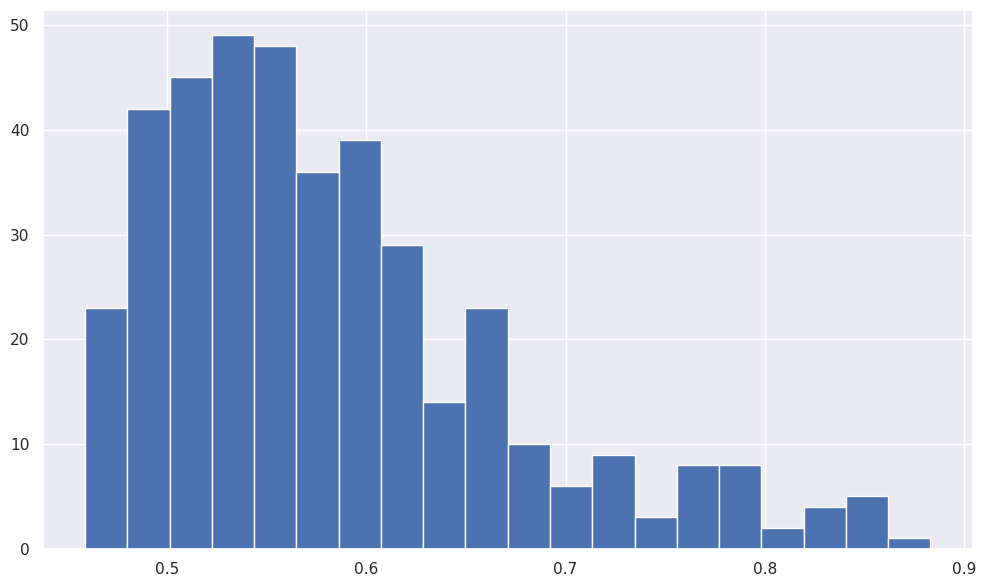

In [62]:
df_ttest.semantic_similarity_Lin.hist(bins=20)

### Correlation

#### Entire dataset

In [63]:
df_ttest.corr("spearman")[["mean_train_score", "mean_test_score"]].sort_values(
    "mean_test_score"
)

,mean_train_score,mean_test_score
go_max_sequence_identity,-0.601715,-0.554948
overlap,-0.475341,-0.421120
sample_count_diff,-0.445740,-0.419701
semantic_similarity_Wang,-0.331135,-0.311802
semantic_similarity_Jiang,-0.257080,-0.211793
semantic_similarity_Lin,-0.198645,-0.157243
semantic_similarity_Rel,-0.191353,-0.150204
go_median_sequence_identity,-0.054059,-0.031857
go_mean_sequence_identity,-0.039468,-0.017396
degree_diff,0.025767,0.025946


In [64]:
tmp = df_ttest.corr("spearman")[["mean_train_score", "mean_test_score"]].sort_values(
    "mean_test_score"
)
tmp = tmp.set_index(tmp.reset_index()["index"].apply(lambda x: x.replace("_", " ")))
tmp = tmp.rename(
    columns={
        "mean_train_score": "mean train score",
        "mean_test_score": "mean test score",
    }
)
tmp.index = tmp.index.rename("score")
tmp
print(tmp.to_latex())

\begin{tabular}{lrr}
\toprule
 & mean train score & mean test score \\
score &  &  \\
\midrule
go max sequence identity & -0.601715 & -0.554948 \\
overlap & -0.475341 & -0.421120 \\
sample count diff & -0.445740 & -0.419701 \\
semantic similarity Wang & -0.331135 & -0.311802 \\
semantic similarity Jiang & -0.257080 & -0.211793 \\
semantic similarity Lin & -0.198645 & -0.157243 \\
semantic similarity Rel & -0.191353 & -0.150204 \\
go median sequence identity & -0.054059 & -0.031857 \\
go mean sequence identity & -0.039468 & -0.017396 \\
degree diff & 0.025767 & 0.025946 \\
in degree diff & 0.028103 & 0.028138 \\
out degree diff & 0.217849 & 0.225246 \\
semantic similarity Resnik & 0.303949 & 0.302703 \\
go min sequence identity & 0.441621 & 0.405356 \\
mean train score & 1.000000 & 0.956613 \\
mean test score & 0.956613 & 1.000000 \\
\bottomrule
\end{tabular}



## Pipeline code

Pipe 4:

In [138]:
import itertools
from copy import copy
import numpy as np
import os
from subpred.go_annotations import get_go_subgraph


def get_proteins(go_set: set, go_id_to_proteins: dict):

    protein_set = set()
    for go_term in go_set:
        protein_set.update(go_id_to_proteins[go_term])
    return protein_set


def get_go_subset(
    df_uniprot_goa, root_node="GO:0022857", min_samples=20, excluded_terms=None
):

    graph_go = get_go_subgraph(
        graph_go=load_df("go_obo"),
        root_node=root_node,
        keys={"is_a"},
        namespaces={"molecular_function"},
    )

    go_terms_set = set(graph_go.nodes())
    go_terms_set = set(df_uniprot_goa.go_id_ancestor.unique()) & go_terms_set

    go_term_to_sample_count = (
        df_uniprot_goa[["go_id_ancestor", "Uniprot"]]
        .drop_duplicates()
        .groupby("go_id_ancestor")
        .apply(len)
        .to_dict()
    )

    if min_samples:
        go_terms_set = go_terms_set & set(
            {
                go_term
                for go_term, sample_count in go_term_to_sample_count.items()
                if sample_count >= min_samples
            }
        )

    go_terms_set = {go_term for go_term in go_terms_set if go_term != root_node}
    if excluded_terms:
        go_terms_set = go_terms_set - excluded_terms
    go_terms_list = sorted(list(go_terms_set))
    return go_terms_list


def get_pairwise_test_scores(
    df_sequences,
    df_uniprot_goa,
    min_samples_unique=5,
    exclude_iea_go_terms=EXCLUDE_IEA_GO_TERMS,
):
    file_name = f"ml_models_min{min_samples_unique}.pickle"

    if not os.path.isfile(file_name):
        # recalculating with lower threshold to include more terms
        pairwise_eval_results = get_model_evaluation_matrix_parallel(
            df_sequences,  # TODO try embeddings here?
            df_uniprot_goa,
            exclude_iea=exclude_iea_go_terms,
            standardize_samples=True,
            multi_output=True,
            min_samples_per_class=20,
            min_unique_samples_per_class=min_samples_unique,
            model_name="pbest_svc_multi",  # kbest_svc_multi, pca_svc_multi
            feature_selection_parameters=[10, 20, 50],  # TODO try other model here?
            n_jobs=-1,
        )
        df_train_results, df_test_results = process_pairwise_eval_results(
            pairwise_eval_results, df_uniprot_goa, convert_go_ids_to_terms=False
        )
        df_test_scores_new = df_test_results
        df_test_scores_new.to_pickle(file_name)
    else:
        df_test_scores_new = pd.read_pickle(file_name)

    return df_test_scores_new


def get_go_id_to_level(go_terms_list, root_node="GO:0022857"):
    graph_go = get_go_subgraph(
        graph_go=load_df("go_obo"),
        root_node=root_node,
        keys={"is_a"},
        namespaces={"molecular_function"},
    )

    go_id_to_level = {
        go_id: len(nx.shortest_path(graph_go, go_id, root_node))
        for go_id in go_terms_list
    }
    return go_id_to_level


def optimize_subset(
    go_terms_list: list,
    df_test_scores: pd.DataFrame,
    go_id_to_proteins: dict,
    go_id_to_level: dict,
    min_coverage: float = 0.8,
    epsilon_f1: float = 0.0,
    nan_value: float = 0.0,
    prefer_abstract_terms: bool = False,
    verbose: bool = True,
    random_seed: int = 1,
):
    total_proteins_before = len(get_proteins(go_terms_list, go_id_to_proteins))
    current_subset = copy(go_terms_list)
    df_test_scores_subset = df_test_scores.loc[go_terms_list, go_terms_list]
    random_generator = np.random.default_rng(seed=random_seed)
    while True:
        go_term_to_f1_when_removed = list()
        for go_term in current_subset:
            next_potential_subset = list(filter(lambda x: x != go_term, current_subset))
            next_coverage = (
                len(get_proteins(set(next_potential_subset), go_id_to_proteins))
                / total_proteins_before
            )
            if next_coverage < min_coverage:
                continue

            # remove go term, save average and min f1 across all pairs
            df_test_scores_subset_new = df_test_scores_subset.loc[
                next_potential_subset, next_potential_subset
            ]

            # Only keep non-diagonal values, replace NaN with 0 for calculating the average
            df_test_scores_subset_new_long = df_test_scores_subset_new.melt(
                ignore_index=False, value_name="f1_score"
            ).reset_index()
            df_test_scores_subset_new_long = df_test_scores_subset_new_long[
                df_test_scores_subset_new_long.pos_label
                != df_test_scores_subset_new_long.neg_label
            ]
            df_test_scores_subset_new_long.f1_score = df_test_scores_subset_new_long.f1_score.transform(
                # means that not enough unique samples (less than MIN_SAMPLES_UNIQUE)
                lambda s: nan_value if np.isnan(s) else s
            )
            f1_when_removed = (
                df_test_scores_subset_new_long.f1_score.mean()
            )  # TODO try min and max, maybe adjust max_value as well
            go_term_to_f1_when_removed.append((go_term, f1_when_removed))

        if len(go_term_to_f1_when_removed) < 1:
            break

        go_term_to_f1_when_removed = sorted(
            go_term_to_f1_when_removed, key=lambda x: x[1], reverse=True
        )

        max_value = go_term_to_f1_when_removed[0][1]
        possible_go_terms_to_remove = [
            go_term
            for go_term, f1_score in go_term_to_f1_when_removed
            if f1_score >= max_value - epsilon_f1
        ]

        # Tie breaker 1: distance to root node. Select term with highest or lowest
        possible_go_terms_to_remove_levels = [
            (go_id, go_id_to_level[go_id]) for go_id in possible_go_terms_to_remove
        ]
        possible_go_terms_to_remove_levels = sorted(
            possible_go_terms_to_remove_levels,
            key=lambda x: x[1],
            reverse=prefer_abstract_terms,
        )
        selected_level = possible_go_terms_to_remove_levels[0][1]
        possible_go_terms_to_remove = [
            k for k, v in possible_go_terms_to_remove_levels if v == selected_level
        ]
        assert (
            possible_go_terms_to_remove[0] == possible_go_terms_to_remove_levels[0][0]
        )

        # tie breaker 2: random sample.
        go_term_to_remove = random_generator.choice(possible_go_terms_to_remove)
        current_subset = list(filter(lambda x: x != go_term_to_remove, current_subset))

        if verbose:
            print(possible_go_terms_to_remove_levels)
            print(max_value)
            print(go_term_to_f1_when_removed)
            print(possible_go_terms_to_remove)
    return current_subset


def count_nans_nondiag(df):
    return np.isnan(df.values.ravel()).sum() - df.shape[0]


def get_subset_eval(
    go_terms_subset: list,
    all_proteins: list,
    go_id_to_proteins: dict,
    df_test_scores_new: pd.DataFrame,
):
    coverage = len(get_proteins(go_terms_subset, go_id_to_proteins)) / len(
        get_proteins(all_proteins, go_id_to_proteins)
    )
    df_scores_subset = df_test_scores_new.loc[go_terms_subset, go_terms_subset]
    mean = df_scores_subset.mean(axis=None, skipna=True)
    median = df_scores_subset.median(axis=None, skipna=True)
    std = df_scores_subset.values.std(
        axis=None, where=~np.isnan(df_scores_subset.values)
    )
    nans = count_nans_nondiag(df_scores_subset)

    return pd.Series(
        [coverage, mean, median, std, nans, len(go_terms_subset)],
        index=["coverage", "mean", "median", "std", "nans", "subset_length"],
    )


def get_go_id_to_proteins(df_uniprot_goa):

    go_id_to_proteins = (
        df_uniprot_goa[["Uniprot", "go_id_ancestor"]]
        .groupby("go_id_ancestor")
        .agg(set)
        .Uniprot.to_dict()
    )
    return go_id_to_proteins


def subset_pipeline(
    df_uniprot_goa,
    df_sequences,
    root_node="GO:0022857",
    min_samples_per_term=20,
    min_unique_samples_per_term=5,
    min_coverage=0.8,
    epsilon_f1=0.0,
    nan_value=0.0,
    prefer_abstract_terms=False,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=False,
):
    go_id_to_proteins = get_go_id_to_proteins(df_uniprot_goa)

    go_terms_list = get_go_subset(
        df_uniprot_goa=df_uniprot_goa,
        root_node=root_node,
        min_samples=min_samples_per_term,
        excluded_terms=excluded_terms,
    )

    go_id_to_level = get_go_id_to_level(go_terms_list, root_node=root_node)

    df_test_scores_new = get_pairwise_test_scores(
        df_sequences=df_sequences,
        df_uniprot_goa=df_uniprot_goa,
        min_samples_unique=min_unique_samples_per_term,
    )
    if return_baseline_scores:
        scores_before = get_subset_eval(
            go_terms_subset=go_terms_list,
            all_proteins=go_terms_list,
            go_id_to_proteins=go_id_to_proteins,
            df_test_scores_new=df_test_scores_new,
        )
        return go_terms_list, scores_before

    optimized_subset = optimize_subset(
        go_terms_list=go_terms_list,
        df_test_scores=df_test_scores_new,
        go_id_to_proteins=go_id_to_proteins,
        go_id_to_level=go_id_to_level,
        min_coverage=min_coverage,
        epsilon_f1=epsilon_f1,
        nan_value=nan_value,
        prefer_abstract_terms=prefer_abstract_terms,
        verbose=verbose,
        random_seed=random_seed,
    )
    scores_after = get_subset_eval(
        go_terms_subset=optimized_subset,
        all_proteins=go_terms_list,
        go_id_to_proteins=go_id_to_proteins,
        df_test_scores_new=df_test_scores_new,
    )

    if return_scores:
        return optimized_subset, scores_after

    return optimized_subset


mechanism_related_terms = {
    "GO:0015291",
    "GO:0015399",
    "GO:0022803",
    "GO:0022804",
    "GO:0015267",
    "GO:0015293",
    "GO:0015297",
    "GO:0140359",
    "GO:0042626",
}

optimized_subset, scores_after = subset_pipeline(
    df_uniprot_goa,
    df_sequences,
    min_samples_per_term=20,
    min_unique_samples_per_term=10,
    min_coverage=0.98,
    epsilon_f1=0.0,
    nan_value=-1.0,
    prefer_abstract_terms=False,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=False,
)
display(scores_after)

go_id_to_proteins = get_go_id_to_proteins(df_uniprot_goa=df_uniprot_goa)

sorted([(go_id_to_term[go_id], len(go_id_to_proteins[go_id])) for go_id in optimized_subset])


coverage          0.980645
mean              0.806333
median            0.872172
std               0.163179
nans              0.000000
subset_length    11.000000
dtype: float64

[('amide transmembrane transporter activity', 21),
 ('carbohydrate derivative transmembrane transporter activity', 25),
 ('carboxylic acid transmembrane transporter activity', 64),
 ('monoatomic cation transmembrane transporter activity', 131),
 ('organophosphate ester transmembrane transporter activity', 22),
 ('passive transmembrane transporter activity', 32),
 ('primary active transmembrane transporter activity', 61),
 ('protein transmembrane transporter activity', 21),
 ('salt transmembrane transporter activity', 72),
 ('secondary active transmembrane transporter activity', 80),
 ('sulfur compound transmembrane transporter activity', 21)]

what were the scores before optimization?

In [66]:
subset_before, scores_before = subset_pipeline(
    df_uniprot_goa,
    df_sequences,
    min_samples_per_term=20,
    min_unique_samples_per_term=5,
    min_coverage=0.9,
    epsilon_f1=0.0,
    nan_value=-1.0,
    prefer_abstract_terms=False,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=True
)
scores_before

coverage           1.000000
mean               0.856547
median             0.900735
std                0.141322
nans             224.000000
subset_length     36.000000
dtype: float64

How many GO terms before filtering for 20 annotated proteins or more?

In [67]:
len(get_go_subset(
    df_uniprot_goa, root_node="GO:0022857", min_samples=None, excluded_terms=None
))

287

Creating plots of coverage vs. other scores at different values of min_unique_samples_per_term:

In [69]:
from joblib import Parallel, delayed
from sklearn.model_selection import ParameterGrid

def save_params(
    df_uniprot_goa,
    df_sequences,
    **kwargs
):
    # method used for parallelizing evaluation, saves parameters for each iteration
    subset, scores = subset_pipeline(
        df_uniprot_goa,
        df_sequences,
        **kwargs
    )
    # params = {k:v for k,v in kwargs.items() if }
    return pd.concat([pd.DataFrame.from_dict(kwargs, orient="index"), scores])
    

param_grid = {
    "prefer_abstract_terms": [True, False],
    "min_unique_samples_per_term": [5, 10, 15, 20],
    "min_coverage": [x / 100 for x in reversed(range(1, 101))][:50],
}

res = Parallel(n_jobs=-1, backend="multiprocessing")(
    delayed(save_params)(
        df_uniprot_goa=df_uniprot_goa,
        df_sequences=df_sequences,
        min_samples_per_term=20,
        epsilon_f1=0.0,
        nan_value=-1.0,
        verbose=False,
        excluded_terms=None,
        random_seed=1,
        return_scores=True,
        return_baseline_scores=False,
        **parameter_set
    )
    for parameter_set in ParameterGrid(param_grid=param_grid)
)
df_plot = pd.concat(res, axis=1).transpose().reset_index(drop=True)
df_plot.head()


,min_samples_per_term,epsilon_f1,nan_value,verbose,excluded_terms,random_seed,return_scores,return_baseline_scores,min_coverage,min_unique_samples_per_term,prefer_abstract_terms,coverage,mean,median,std,nans,subset_length
0,20,0.0,-1.0,False,None,1,True,False,1.0,5,True,1.0,0.816143,0.893333,0.168306,6.0,13.0
1,20,0.0,-1.0,False,None,1,True,False,1.0,5,False,1.0,0.816143,0.893333,0.168306,6.0,13.0
2,20,0.0,-1.0,False,None,1,True,False,1.0,10,True,1.0,0.816195,0.88807,0.168996,8.0,13.0
3,20,0.0,-1.0,False,None,1,True,False,1.0,10,False,1.0,0.816195,0.88807,0.168996,8.0,13.0
4,20,0.0,-1.0,False,None,1,True,False,1.0,15,True,1.0,0.821348,0.886977,0.154405,24.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,20,0.0,-1.0,False,None,1,True,False,0.51,10,False,0.516129,0.922553,0.949206,0.06822,0.0,8.0
396,20,0.0,-1.0,False,None,1,True,False,0.51,15,True,0.512903,0.931882,0.941342,0.052263,0.0,6.0
397,20,0.0,-1.0,False,None,1,True,False,0.51,15,False,0.512903,0.931882,0.941342,0.052263,0.0,6.0
398,20,0.0,-1.0,False,None,1,True,False,0.51,20,True,0.522581,0.908517,0.917893,0.053094,0.0,5.0


Ignoring prefer_abstract_terms for now (did not have impact on plot):

In [70]:
df_plot_concrete = df_plot[df_plot.prefer_abstract_terms == False]

Plot 1: Coverage vs number of nans vs min unique samples

In [179]:
import matplotlib.pyplot as plt


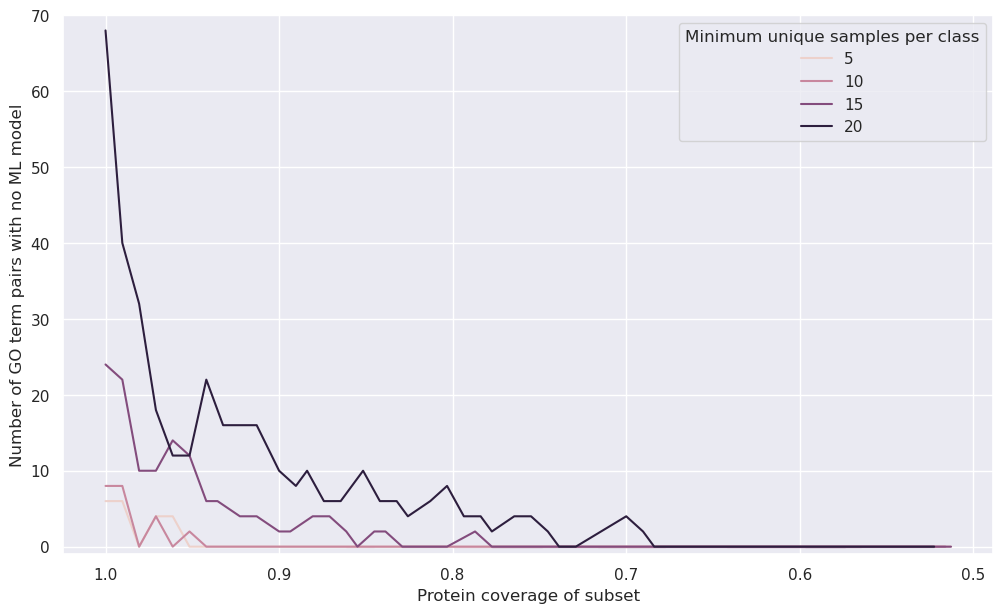

In [182]:
g = sns.lineplot(df_plot_concrete, x="coverage", y="nans", hue="min_unique_samples_per_term")
g.invert_xaxis()
g.set_ylim((-1,df_plot.nans.max()+2))
g.set_ylabel("Number of GO term pairs with no ML model")
g.set_xlabel("Protein coverage of subset")
g.legend(title="Minimum unique samples per class")
plt.savefig("nans.png", dpi=300)

Coverage vs. mean F1 score

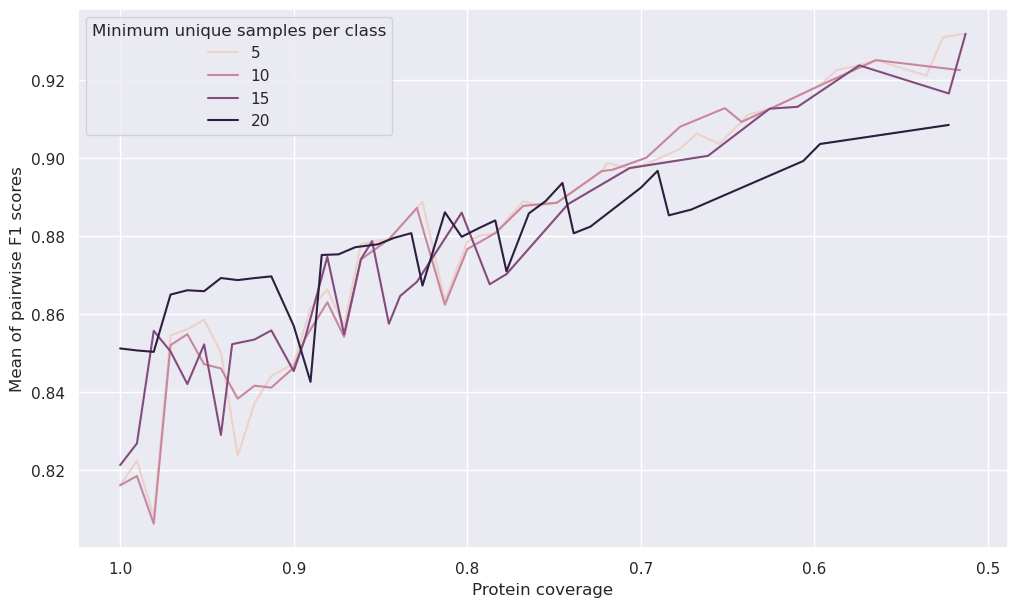

In [183]:
g = sns.lineplot(df_plot_concrete, x="coverage", y="mean", hue="min_unique_samples_per_term")
g.invert_xaxis()
g.set_xlabel("Protein coverage")
g.set_ylabel("Mean of pairwise F1 scores")
g.legend(title="Minimum unique samples per class")
plt.savefig("mean.png", dpi=300)


Coverage vs median f1 score

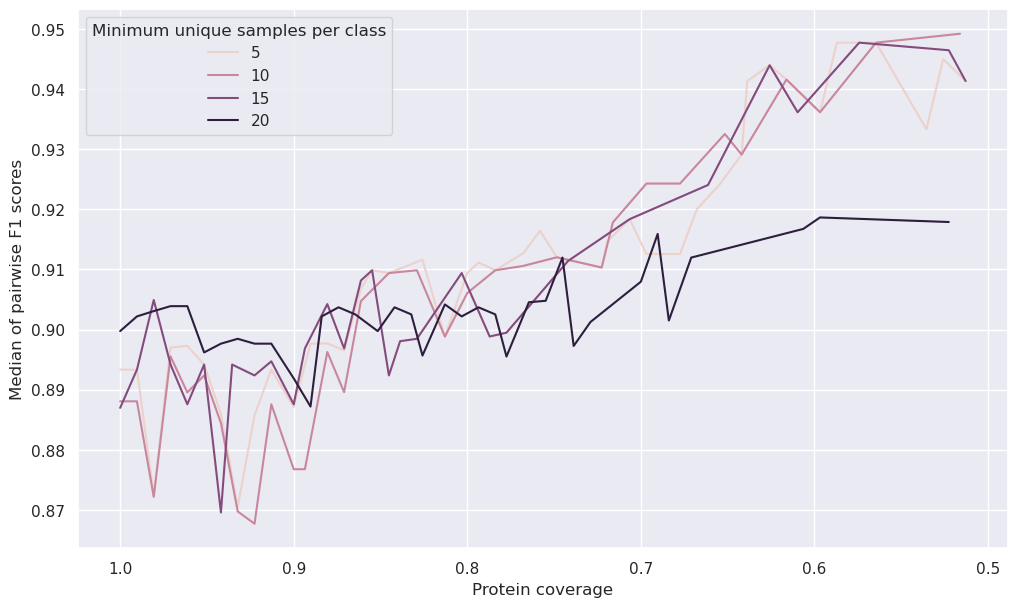

In [184]:
g = sns.lineplot(df_plot_concrete, x="coverage", y="median", hue="min_unique_samples_per_term")
g.invert_xaxis()
g.set_xlabel("Protein coverage")
g.set_ylabel("Median of pairwise F1 scores")
g.legend(title="Minimum unique samples per class")
plt.savefig("median.png", dpi=300)

# g.set_ylim((0,1))

Coverage vs. subset length vs min_unique_samples

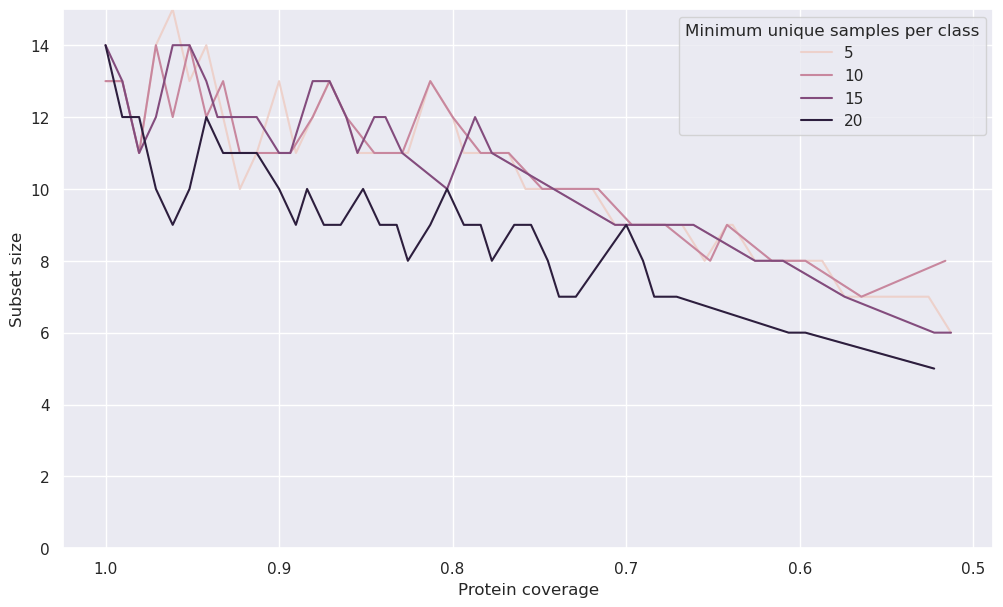

In [185]:
g = sns.lineplot(df_plot_concrete, x="coverage", y="subset_length", hue="min_unique_samples_per_term")
g.invert_xaxis()
g.set_ylim((0,df_plot["subset_length"].max()))
g.set_xlabel("Protein coverage")
g.set_ylabel("Subset size")
g.legend(title="Minimum unique samples per class")
plt.savefig("subset_size.png", dpi=300)

Best subset based on plots, mentioned in paper:

In [139]:
# The optimal subset:
display(df_plot_concrete[(df_plot_concrete.min_unique_samples_per_term == 10) &(df_plot_concrete.min_coverage == 0.98)].sort_values("coverage", ascending=False))
best_subset, best_subset_scores = subset_pipeline(
    df_uniprot_goa=df_uniprot_goa,
    df_sequences=df_sequences,
    min_samples_per_term=20,
    epsilon_f1=0.0,
    nan_value=-1.0,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=False,
    min_unique_samples_per_term=10,
    min_coverage=0.98,
    prefer_abstract_terms=False    
)


go_id_to_proteins = get_go_id_to_proteins(df_uniprot_goa=df_uniprot_goa)

sorted([(go_id_to_term[go_id], len(go_id_to_proteins[go_id])) for go_id in best_subset])

,min_samples_per_term,epsilon_f1,nan_value,verbose,excluded_terms,random_seed,return_scores,return_baseline_scores,min_coverage,min_unique_samples_per_term,prefer_abstract_terms,coverage,mean,median,std,nans,subset_length
19,20,0.0,-1.0,False,None,1,True,False,0.98,10,False,0.980645,0.806333,0.872172,0.163179,0.0,11.0


[('amide transmembrane transporter activity', 21),
 ('carbohydrate derivative transmembrane transporter activity', 25),
 ('carboxylic acid transmembrane transporter activity', 64),
 ('monoatomic cation transmembrane transporter activity', 131),
 ('organophosphate ester transmembrane transporter activity', 22),
 ('passive transmembrane transporter activity', 32),
 ('primary active transmembrane transporter activity', 61),
 ('protein transmembrane transporter activity', 21),
 ('salt transmembrane transporter activity', 72),
 ('secondary active transmembrane transporter activity', 80),
 ('sulfur compound transmembrane transporter activity', 21)]

What about the other parameters? Can optimizing all other parameters (except min_coverage) improve results?

In [143]:
# generating results for parameter combinations:
param_grid = {
    "epsilon_f1": [0.0, 0.01, 0.05],
    "random_seed": list(range(1, 5)),
    "prefer_abstract_terms": [True, False],
    "min_unique_samples_per_term": [5, 10, 15, 20],
    "nan_value": [-1,0],
    "min_coverage": [1.0, 0.99, 0.98],
}
res = Parallel(n_jobs=-3, backend="multiprocessing")(
    delayed(save_params)(
        df_uniprot_goa=df_uniprot_goa,
        df_sequences=df_sequences,
        min_samples_per_term=20,
        verbose=False,
        excluded_terms=None,
        return_scores=True,
        return_baseline_scores=False,
        **parameter_set
    )
    for parameter_set in ParameterGrid(param_grid=param_grid)
)
df_random = pd.concat(res, axis=1).T.reset_index(drop=True)
df_random_nonan = df_random[(df_random.nans == 0)]
df_random_nonan_abstract = df_random_nonan[df_random_nonan.prefer_abstract_terms == True]
df_random_nonan_concrete = df_random_nonan[df_random_nonan.prefer_abstract_terms == False]

optimizing all parameters for f1:

In [188]:
df_random_nonan_abstract[df_random_nonan_abstract.min_unique_samples_per_term == 10].sort_values(["median", "coverage"], ascending=False).head(10)

,min_samples_per_term,verbose,excluded_terms,return_scores,return_baseline_scores,epsilon_f1,min_coverage,min_unique_samples_per_term,nan_value,prefer_abstract_terms,random_seed,coverage,mean,median,std,nans,subset_length
273,20,False,None,True,False,0.01,0.99,10,-1,True,2,0.990323,0.798454,0.8736,0.184259,0.0,11.0
144,20,False,None,True,False,0.0,0.98,10,-1,True,1,0.980645,0.806333,0.872172,0.163179,0.0,11.0
145,20,False,None,True,False,0.0,0.98,10,-1,True,2,0.980645,0.806333,0.872172,0.163179,0.0,11.0
146,20,False,None,True,False,0.0,0.98,10,-1,True,3,0.980645,0.806333,0.872172,0.163179,0.0,11.0
147,20,False,None,True,False,0.0,0.98,10,-1,True,4,0.980645,0.806333,0.872172,0.163179,0.0,11.0
528,20,False,None,True,False,0.05,0.98,10,-1,True,1,0.983871,0.777324,0.87039,0.194249,0.0,8.0
536,20,False,None,True,False,0.05,0.98,10,0,True,1,0.983871,0.777324,0.87039,0.194249,0.0,8.0
336,20,False,None,True,False,0.01,0.98,10,-1,True,1,0.980645,0.80413,0.86172,0.168157,0.0,11.0
337,20,False,None,True,False,0.01,0.98,10,-1,True,2,0.980645,0.80413,0.86172,0.168157,0.0,11.0
338,20,False,None,True,False,0.01,0.98,10,-1,True,3,0.980645,0.80413,0.86172,0.168157,0.0,11.0


In [189]:
df_random_nonan_concrete[df_random_nonan_concrete.min_unique_samples_per_term == 10].sort_values(["median", "coverage"], ascending=False).head(10)

,min_samples_per_term,verbose,excluded_terms,return_scores,return_baseline_scores,epsilon_f1,min_coverage,min_unique_samples_per_term,nan_value,prefer_abstract_terms,random_seed,coverage,mean,median,std,nans,subset_length
148,20,False,None,True,False,0.0,0.98,10,-1,False,1,0.980645,0.806333,0.872172,0.163179,0.0,11.0
149,20,False,None,True,False,0.0,0.98,10,-1,False,2,0.980645,0.806333,0.872172,0.163179,0.0,11.0
150,20,False,None,True,False,0.0,0.98,10,-1,False,3,0.980645,0.806333,0.872172,0.163179,0.0,11.0
151,20,False,None,True,False,0.0,0.98,10,-1,False,4,0.980645,0.806333,0.872172,0.163179,0.0,11.0
340,20,False,None,True,False,0.01,0.98,10,-1,False,1,0.980645,0.80609,0.872172,0.162979,0.0,11.0
341,20,False,None,True,False,0.01,0.98,10,-1,False,2,0.980645,0.80609,0.872172,0.162979,0.0,11.0
342,20,False,None,True,False,0.01,0.98,10,-1,False,3,0.980645,0.80609,0.872172,0.162979,0.0,11.0
343,20,False,None,True,False,0.01,0.98,10,-1,False,4,0.980645,0.80609,0.872172,0.162979,0.0,11.0
348,20,False,None,True,False,0.01,0.98,10,0,False,1,0.980645,0.80609,0.872172,0.162979,0.0,11.0
349,20,False,None,True,False,0.01,0.98,10,0,False,2,0.980645,0.80609,0.872172,0.162979,0.0,11.0


best subset when optimizing all parameters for f1, prefer abstract terms:

In [158]:
params = df_random_nonan_abstract.sort_values(["median", "coverage"], ascending=False).iloc[0][
    [
        "min_samples_per_term",
        "verbose",
        "excluded_terms",
        "return_scores",
        "return_baseline_scores",
        "epsilon_f1",
        "min_coverage",
        "min_unique_samples_per_term",
        "nan_value",
        "prefer_abstract_terms",
        "random_seed",
    ]
].to_dict()
subset, _ = subset_pipeline(df_uniprot_goa, df_sequences, **params)
sorted([go_id_to_term[go_id] for go_id in subset])

['amide transmembrane transporter activity',
 'inorganic molecular entity transmembrane transporter activity',
 'macromolecule transmembrane transporter activity',
 'monoatomic ion transmembrane transporter activity',
 'nucleobase-containing compound transmembrane transporter activity',
 'organic acid transmembrane transporter activity',
 'organophosphate ester transmembrane transporter activity',
 'primary active transmembrane transporter activity',
 'secondary active transmembrane transporter activity']

best subset when optimizing all parameters for f1, prefer concrete terms:

In [159]:
params = df_random_nonan_concrete.sort_values(["median", "coverage"], ascending=False).iloc[0][
    [
        "min_samples_per_term",
        "verbose",
        "excluded_terms",
        "return_scores",
        "return_baseline_scores",
        "epsilon_f1",
        "min_coverage",
        "min_unique_samples_per_term",
        "nan_value",
        "prefer_abstract_terms",
        "random_seed",
    ]
].to_dict()
subset, _ = subset_pipeline(df_uniprot_goa, df_sequences, **params)
sorted([go_id_to_term[go_id] for go_id in subset])

['ABC-type transporter activity',
 'amide transmembrane transporter activity',
 'carbohydrate derivative transmembrane transporter activity',
 'carboxylic acid transmembrane transporter activity',
 'channel activity',
 'inorganic cation transmembrane transporter activity',
 'monoatomic cation transmembrane transporter activity',
 'organophosphate ester transmembrane transporter activity',
 'protein transmembrane transporter activity',
 'salt transmembrane transporter activity',
 'secondary active transmembrane transporter activity',
 'sulfur compound transmembrane transporter activity']

optimizing all parameters for coverage:

In [164]:
df_random_nonan_abstract.sort_values(["coverage", "median"], ascending=False).head(10)

,min_samples_per_term,verbose,excluded_terms,return_scores,return_baseline_scores,epsilon_f1,min_coverage,min_unique_samples_per_term,nan_value,prefer_abstract_terms,random_seed,coverage,mean,median,std,nans,subset_length
264,20,False,None,True,False,0.01,0.99,5,0,True,1,0.990323,0.808792,0.886334,0.175684,0.0,10.0
265,20,False,None,True,False,0.01,0.99,5,0,True,2,0.990323,0.808792,0.886334,0.175684,0.0,10.0
257,20,False,None,True,False,0.01,0.99,5,-1,True,2,0.990323,0.804201,0.885927,0.190645,0.0,12.0
258,20,False,None,True,False,0.01,0.99,5,-1,True,3,0.990323,0.8086,0.884673,0.183232,0.0,12.0
256,20,False,None,True,False,0.01,0.99,5,-1,True,1,0.990323,0.812376,0.876774,0.165775,0.0,11.0
266,20,False,None,True,False,0.01,0.99,5,0,True,3,0.990323,0.812376,0.876774,0.165775,0.0,11.0
273,20,False,None,True,False,0.01,0.99,10,-1,True,2,0.990323,0.798454,0.8736,0.184259,0.0,11.0
448,20,False,None,True,False,0.05,0.99,5,-1,True,1,0.990323,0.759581,0.866237,0.209651,0.0,10.0
451,20,False,None,True,False,0.05,0.99,5,-1,True,4,0.990323,0.766119,0.860136,0.199794,0.0,10.0
449,20,False,None,True,False,0.05,0.99,5,-1,True,2,0.990323,0.760906,0.855144,0.206392,0.0,10.0


In [165]:
df_random_nonan_concrete.sort_values(["coverage", "median"], ascending=False).head(10)

,min_samples_per_term,verbose,excluded_terms,return_scores,return_baseline_scores,epsilon_f1,min_coverage,min_unique_samples_per_term,nan_value,prefer_abstract_terms,random_seed,coverage,mean,median,std,nans,subset_length
517,20,False,None,True,False,0.05,0.98,5,-1,False,2,0.980645,0.816673,0.87794,0.171638,0.0,12.0
525,20,False,None,True,False,0.05,0.98,5,0,False,2,0.980645,0.825296,0.877279,0.142505,0.0,11.0
332,20,False,None,True,False,0.01,0.98,5,0,False,1,0.980645,0.803931,0.877069,0.167672,0.0,11.0
526,20,False,None,True,False,0.05,0.98,5,0,False,3,0.980645,0.801638,0.877069,0.173218,0.0,11.0
518,20,False,None,True,False,0.05,0.98,5,-1,False,3,0.980645,0.822321,0.876774,0.148574,0.0,11.0
132,20,False,None,True,False,0.0,0.98,5,-1,False,1,0.980645,0.808033,0.872543,0.158637,0.0,11.0
133,20,False,None,True,False,0.0,0.98,5,-1,False,2,0.980645,0.808033,0.872543,0.158637,0.0,11.0
134,20,False,None,True,False,0.0,0.98,5,-1,False,3,0.980645,0.808033,0.872543,0.158637,0.0,11.0
135,20,False,None,True,False,0.0,0.98,5,-1,False,4,0.980645,0.808033,0.872543,0.158637,0.0,11.0
324,20,False,None,True,False,0.01,0.98,5,-1,False,1,0.980645,0.80779,0.872543,0.158434,0.0,11.0


best subset when optimizing all parameters for coverage, abstract terms:

In [166]:
params = df_random_nonan_abstract.sort_values(["coverage", "median"], ascending=False).iloc[0][
    [
        "min_samples_per_term",
        "verbose",
        "excluded_terms",
        "return_scores",
        "return_baseline_scores",
        "epsilon_f1",
        "min_coverage",
        "min_unique_samples_per_term",
        "nan_value",
        "prefer_abstract_terms",
        "random_seed",
    ]
].to_dict()
subset, _ = subset_pipeline(df_uniprot_goa, df_sequences, **params)
sorted([go_id_to_term[go_id] for go_id in subset])

['amide transmembrane transporter activity',
 'inorganic molecular entity transmembrane transporter activity',
 'macromolecule transmembrane transporter activity',
 'monoatomic ion transmembrane transporter activity',
 'nucleobase-containing compound transmembrane transporter activity',
 'organic anion transmembrane transporter activity',
 'passive transmembrane transporter activity',
 'primary active transmembrane transporter activity',
 'salt transmembrane transporter activity',
 'secondary active transmembrane transporter activity']

best subset when optimizing all parameters for coverage, concrete terms:

In [161]:
params = df_random_nonan_concrete.sort_values(["coverage", "median"], ascending=False).iloc[0][
    [
        "min_samples_per_term",
        "verbose",
        "excluded_terms",
        "return_scores",
        "return_baseline_scores",
        "epsilon_f1",
        "min_coverage",
        "min_unique_samples_per_term",
        "nan_value",
        "prefer_abstract_terms",
        "random_seed",
    ]
].to_dict()
subset, _ = subset_pipeline(df_uniprot_goa, df_sequences, **params)
sorted([go_id_to_term[go_id] for go_id in subset])

['ABC-type transporter activity',
 'amide transmembrane transporter activity',
 'carbohydrate derivative transmembrane transporter activity',
 'carboxylic acid transmembrane transporter activity',
 'channel activity',
 'inorganic cation transmembrane transporter activity',
 'monoatomic cation transmembrane transporter activity',
 'organophosphate ester transmembrane transporter activity',
 'protein transmembrane transporter activity',
 'salt transmembrane transporter activity',
 'secondary active transmembrane transporter activity',
 'sulfur compound transmembrane transporter activity']

Impact of prefer_abstract_terms:

In [131]:
df_random[["prefer_abstract_terms", "coverage", "mean", "median", "std", "nans"]].groupby("prefer_abstract_terms").mean()

,coverage,mean,median,std,nans
prefer_abstract_terms,,,,,
False,0.990323,0.828873,0.888994,0.150635,20.5
True,0.990435,0.821228,0.88797,0.159802,17.951389


Impact of random seed:

In [130]:
# df_random[df_random.random_seed == 1]["median"].mean(),df_random[df_random.random_seed == 2]["median"].mean(),df_random[df_random.random_seed == 3]["median"].mean(), df_random[df_random.random_seed == 4]["median"].mean()
df_random[["random_seed", "coverage", "mean", "median", "std", "nans"]].groupby("random_seed").mean()

,coverage,mean,median,std,nans
random_seed,,,,,
1,0.99039,0.824554,0.888904,0.155913,18.694444
2,0.990323,0.824336,0.887502,0.155177,18.625
3,0.99039,0.824419,0.887583,0.155275,18.611111
4,0.990412,0.826894,0.889938,0.15451,20.972222


lower epsilon leads to higher mean and lower std:

In [133]:
df_random[["epsilon_f1", "coverage", "mean", "median", "std", "nans"]].groupby("epsilon_f1").mean()

,coverage,mean,median,std,nans
epsilon_f1,,,,,
0.00,0.990323,0.832769,0.893082,0.149955,19.333333
0.01,0.990373,0.827125,0.888066,0.153472,18.322917
0.05,0.99044,0.815258,0.884297,0.162229,20.020833


correlations:

In [127]:
df_random.drop(["min_samples_per_term", "verbose", "excluded_terms", "return_scores", "return_baseline_scores"], axis=1).corr("kendall")

,epsilon_f1,min_coverage,min_unique_samples_per_term,nan_value,prefer_abstract_terms,random_seed,coverage,mean,median,std,nans,subset_length
epsilon_f1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008036,-0.239554,-0.235020,0.172677,0.027863,-0.287464
min_coverage,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.991872,-0.091985,-0.080889,0.148622,0.280083,0.640239
min_unique_samples_per_term,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.001624,0.503223,0.352844,-0.604846,0.744973,0.007372
nan_value,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.117144,0.092182,-0.068198,0.058505,-0.014647
prefer_abstract_terms,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.009942,-0.128775,-0.012889,0.170482,-0.074658,-0.263094
random_seed,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.002435,0.013906,0.015196,-0.008981,0.031220,0.026178
coverage,0.008036,0.991872,-0.001624,0.000000,0.009942,0.002435,1.000000,-0.095685,-0.083302,0.151965,0.277579,0.629005
mean,-0.239554,-0.091985,0.503223,0.117144,-0.128775,0.013906,-0.095685,1.000000,0.654401,-0.725695,0.469030,0.082189
median,-0.235020,-0.080889,0.352844,0.092182,-0.012889,0.015196,-0.083302,0.654401,1.000000,-0.436925,0.320245,0.002653
std,0.172677,0.148622,-0.604846,-0.068198,0.170482,-0.008981,0.151965,-0.725695,-0.436925,1.000000,-0.486366,-0.039075


https://keras.io/examples/nlp/text_classification_with_transformer/

https://keras.io/examples/nlp/multi_label_classification/



Results





In [74]:
# TODO try other algo than svm: XGBoost, RF, ?
# TODO turn svm into multi-output!!
# TODO refactor

import h5py
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder, MultiLabelBinarizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.feature_selection import SelectPercentile
from sklearn.multioutput import MultiOutputClassifier

from subpred.features import calculate_features
from subpred.features import calculate_features


def get_protein_embeddings(protein_set: set):
    with h5py.File("../data/raw/uniprot/per-protein.h5", "r") as file:
        embeddings = [[protein, *list(file[protein])] for protein in protein_set]
    return pd.DataFrame.from_records(
        embeddings, columns=["Uniprot", *[f"embedding{i}" for i in range(1024)]]
    ).set_index("Uniprot")


def get_ml_dataset(go_subset, use_embeddings=False, df_sequence_features=None):

    labels = (
        df_uniprot_goa[df_uniprot_goa.go_id_ancestor.isin(go_subset)][
            ["Uniprot", "go_id_ancestor"]
        ]
        .drop_duplicates()
        .sort_values(["Uniprot", "go_id_ancestor"])
        .rename(columns={"go_id_ancestor": "go_id"})
        .reset_index(drop=True)
    )

    proteins = labels.Uniprot.unique()

    features = (
        get_protein_embeddings(proteins)
        if use_embeddings
        else df_sequence_features.loc[proteins]
    )

    dataset = labels.merge(features, how="left", left_on="Uniprot", right_index=True)

    return dataset


def evaluate_svm(df_ml_dataset, optimize_hyperparams=True):
    # get proteins
    # dataset = get_ml_dataset(go_subset, use_embeddings=use_embeddings)
    features, labels = (
        df_ml_dataset.drop(["Uniprot", "go_id"], axis=1),
        df_ml_dataset[["Uniprot", "go_id"]],
    )
    label_encoder = LabelEncoder()

    # labels = labels.assign(label=label_encoder.fit_transform(labels.go_id))

    X = features.values
    y = label_encoder.fit_transform(labels.go_id)
    print(y)

    # create pipeline
    model = make_pipeline(
        StandardScaler(),
        SelectPercentile(),
        MultiOutputClassifier(SVC(class_weight="balanced", decision_function_shape="ovo")),
    )
    if optimize_hyperparams:
        model = GridSearchCV(
            model,
            param_grid={
                "multioutputclassifier__estimator__C": [0.1, 1, 10],
                "multioutputclassifier__estimator__gamma": [0.1, 0.01, 0.001, "auto", "scale"],
                "selectpercentile__percentile": [x / 20 for x in range(1, 21)],
            },
            n_jobs=-1,
        )
    # TODO stratify
    return cross_val_score(estimator=model, X=X, y=y, scoring="f1_macro", cv=KFold(5))


assert ~df_sequences.index.duplicated().any()
df_sequence_features = calculate_features(
    df_sequences.sequence, standardize_samples=True
)
df_ml_dataset_seq = get_ml_dataset(
    go_subset=optimized_subset,
    use_embeddings=False,
    df_sequence_features=df_sequence_features,
)
df_ml_dataset_emb = get_ml_dataset(go_subset=optimized_subset, use_embeddings=True)
# ml_dataset = get_ml_dataset(go_subset=current_subset, )

# print(evaluate_svm(df_ml_dataset_seq, optimize_hyperparams=False))
# print(evaluate_svm(df_ml_dataset_seq, optimize_hyperparams=True))

# print(evaluate_svm(df_ml_dataset_emb, optimize_hyperparams=False))
# print(evaluate_svm(df_ml_dataset_emb, optimize_hyperparams=True))

In [75]:
df_ml_dataset_seq.to_pickle("~/keras_test/seq.pickle")
df_ml_dataset_emb.to_pickle("~/keras_test/emb.pickle")
